# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [32]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [ ]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [35]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [4]:
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [5]:
df

First Name   Last Name
0      Panos   Ipeirotis
1       John         Doe
2        NaN       Trump

## Analyzing Data in Files

We will use a dataset with restaurant inspection results in NYC which is stored at `/data/restaurants.csv`.

If you do not have it, then uncomment below the lines that start with ! and execute the following:

In [6]:
# Creates a folder "data" under the current folder
!mkdir -p data
# Removes any prior file if it exists
!rm -f data/restaurant.csv*
# Fetches the most recent dataset and stores it under the folder data
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv
# Compresses the text file, both for saving space and for loading faster
!gzip data/restaurant.csv
# Take a look at the first 3 lines of the file, to ensure that everything worked fine
# !gzip -cd data/restaurant.csv.gz | head -3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  132M    0  132M    0     0  4906k      0 --:--:--  0:00:27 --:--:-- 4813k   0 --:--:--  0:00:17 --:--:-- 5243k


### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [7]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [8]:
restaurants.head(5)

CAMIS                                       DBA       BORO BUILDING  \
0  41142210                                 BARBOUNIA  MANHATTAN      250   
1  40548766                 JOE'S SHANGHAI RESTAURANT  MANHATTAN        9   
2  50017903                         JACK'S WIFE FREDA  MANHATTAN       50   
3  41685823                              ATOMIC WINGS  MANHATTAN      311   
4  41156699  WOOLWORTH TOWER KITCHEN/THE WOOLY PUBLIC  MANHATTAN      233   

              STREET ZIPCODE       PHONE CUISINE DESCRIPTION INSPECTION DATE  \
0  PARK AVENUE SOUTH   10003  2129950242       Mediterranean      04/05/2017   
1        PELL STREET   10013  2122338888             Chinese      07/02/2018   
2         CARMINE ST   10014  6466699877       Mediterranean      06/14/2018   
3           BROADWAY   10007  2125717667             Chicken      07/14/2017   
4           BROADWAY   10279  2125712930            American      02/05/2016   

                                            ACTION VIOLATION CODE  \
0  Violations were cited in the following area(s).            02G   
1  Violations were cited in the following area(s).            10B   
2  Violations were cited in the following area(s).            10F   
3  Violations were cited in the following area(s).            16D   
4  Violations were cited in the following area(s).            09B   

                               VIOLATION DESCRIPTION CRITICAL FLAG SCORE  \
0  Cold food item held above 41Âº F (smoked fish ...      Critical    13   
1  Plumbing not properly installed or maintained;...  Not Critical    17   
2  Non-food contact surface improperly constructe...  Not Critical    10   
3  Posted caloric content on the menu(s), menu bo...  Not Critical   NaN   
4                       Thawing procedures improper.  Not Critical    20   

  GRADE  GRADE DATE RECORD DATE                       INSPECTION TYPE  
0     A  04/05/2017  10/17/2018      Cycle Inspection / Re-inspection  
1     B  07/02/2018  10/17/2018      Cycle Inspection / Re-inspection  
2     A  06/14/2018  10/17/2018      Cycle Inspection / Re-inspection  
3   NaN         NaN  10/17/2018  Calorie Posting / Initial Inspection  
4     B  02/05/2016  10/17/2018      Cycle Inspection / Re-inspection

The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [9]:
restaurants.describe()

CAMIS             DBA       BORO BUILDING    STREET ZIPCODE  \
count     380093          379697     380093   379890    380089  374122   
unique     26822           21206          6     7300      3288     223   
top     50001789  DUNKIN' DONUTS  MANHATTAN        1  BROADWAY   10003   
freq          93            4071     150247     2251     13738    9950   

             PHONE CUISINE DESCRIPTION INSPECTION DATE  \
count       380091              380093          380093   
unique       25424                  85            1344   
top     7185958100            American      01/01/1900   
freq           198               83034            1223   

                                                 ACTION VIOLATION CODE  \
count                                            378870         374014   
unique                                                5             98   
top     Violations were cited in the following area(s).            10F   
freq                                             356721          53189   

                                    VIOLATION DESCRIPTION CRITICAL FLAG  \
count                                              372254        380093   
unique                                                 91             3   
top     Non-food contact surface improperly constructe...      Critical   
freq                                                53189        208369   

         SCORE   GRADE  GRADE DATE RECORD DATE  \
count   360631  192356      190577      380093   
unique     130       6        1261           1   
top         12       A  07/10/2018  10/17/2018   
freq     39327  151688         554      380093   

                              INSPECTION TYPE  
count                                  378870  
unique                                     34  
top     Cycle Inspection / Initial Inspection  
freq                                   216673

We can also check the data types for each column

In [10]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [11]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [12]:
restaurants.SCORE.describe()

count    360631.000000
mean         19.454753
std          13.847604
min          -1.000000
25%          11.000000
50%          14.000000
75%          25.000000
max         156.000000
Name: SCORE, dtype: float64

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

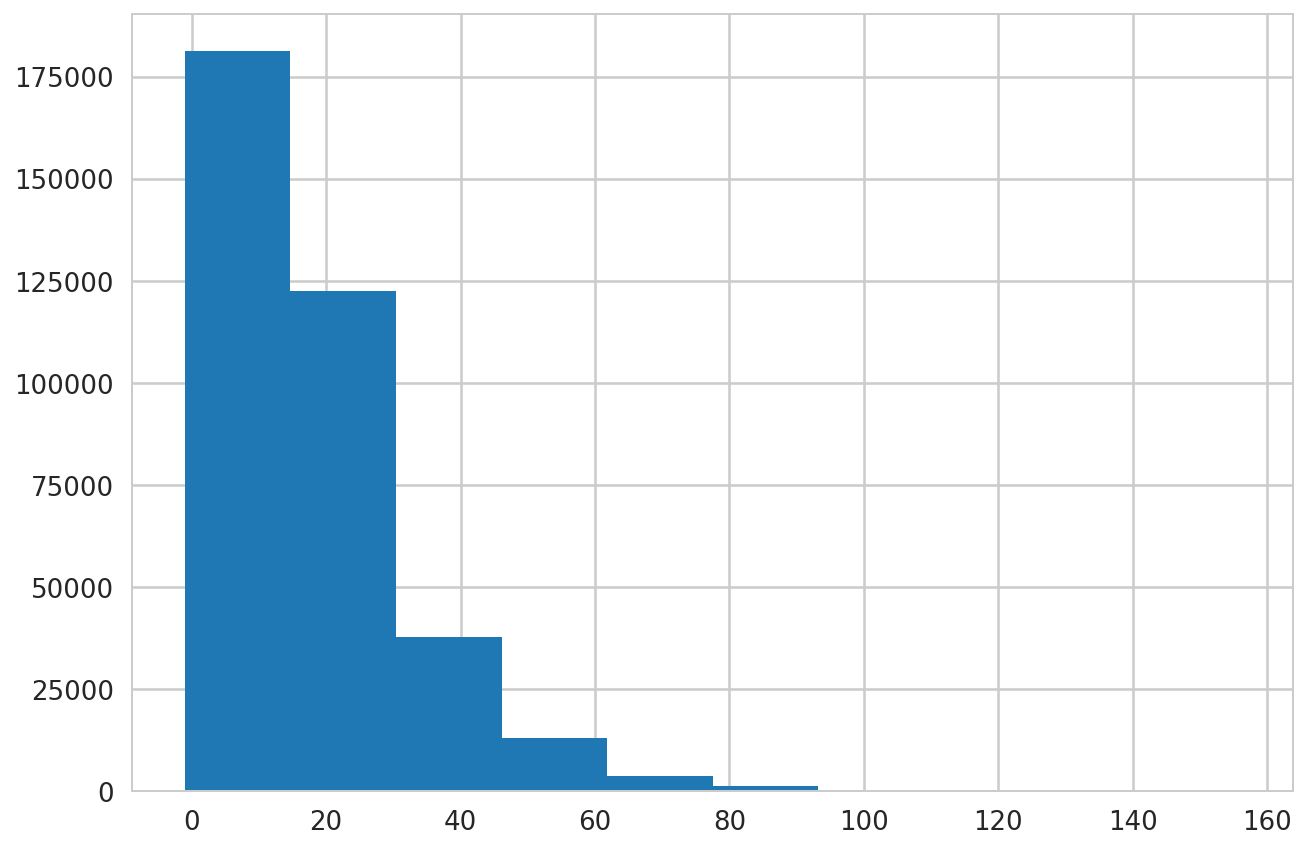

In [13]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

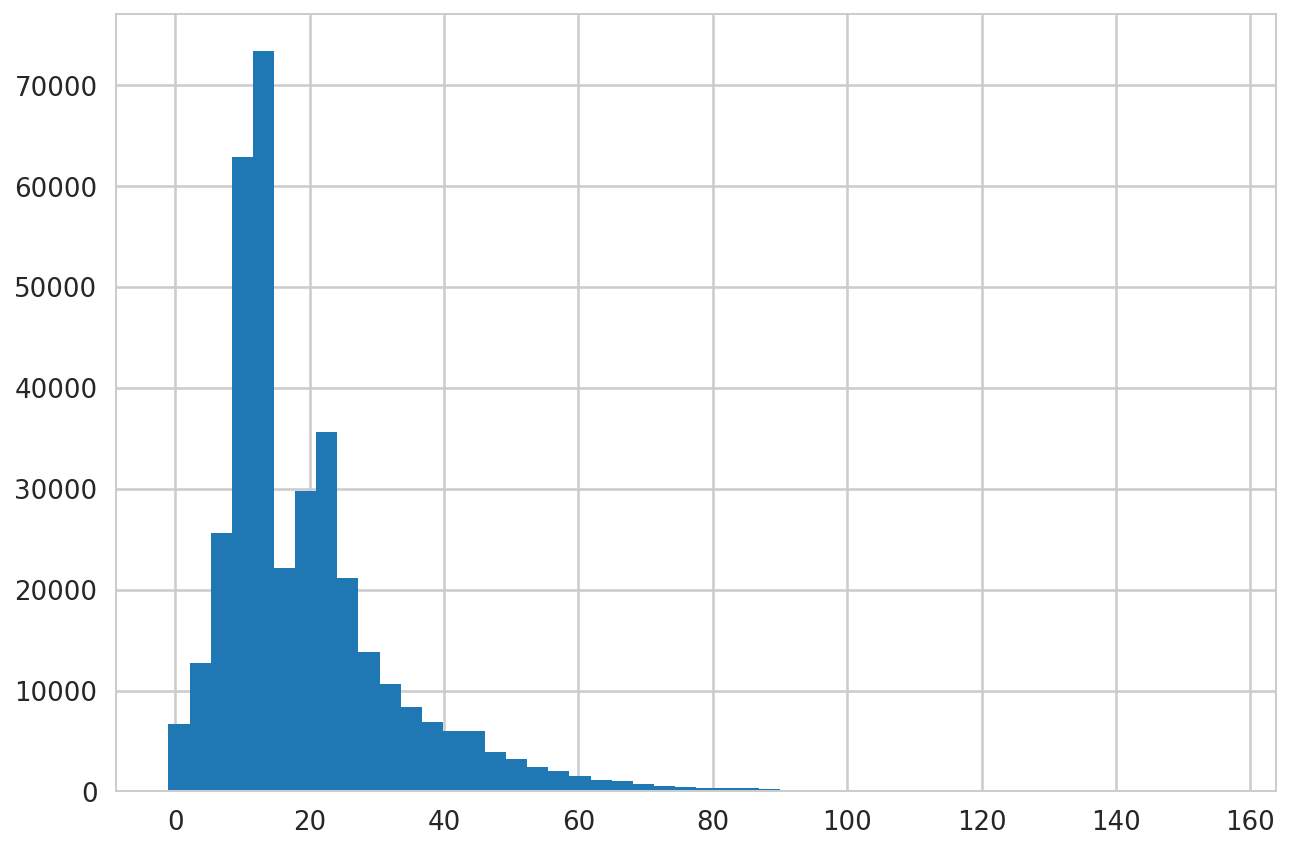

In [14]:
restaurants["SCORE"].hist(bins=50)

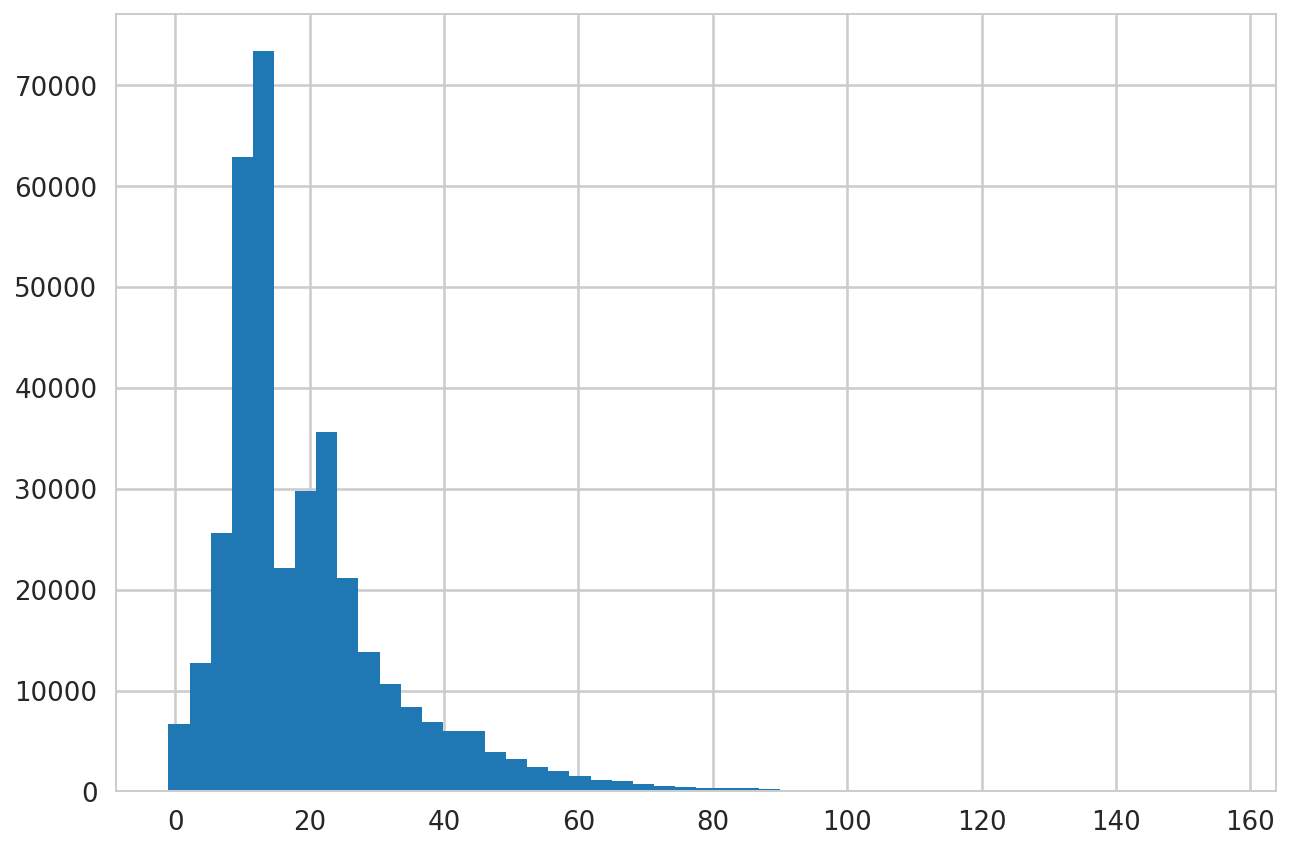

In [15]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

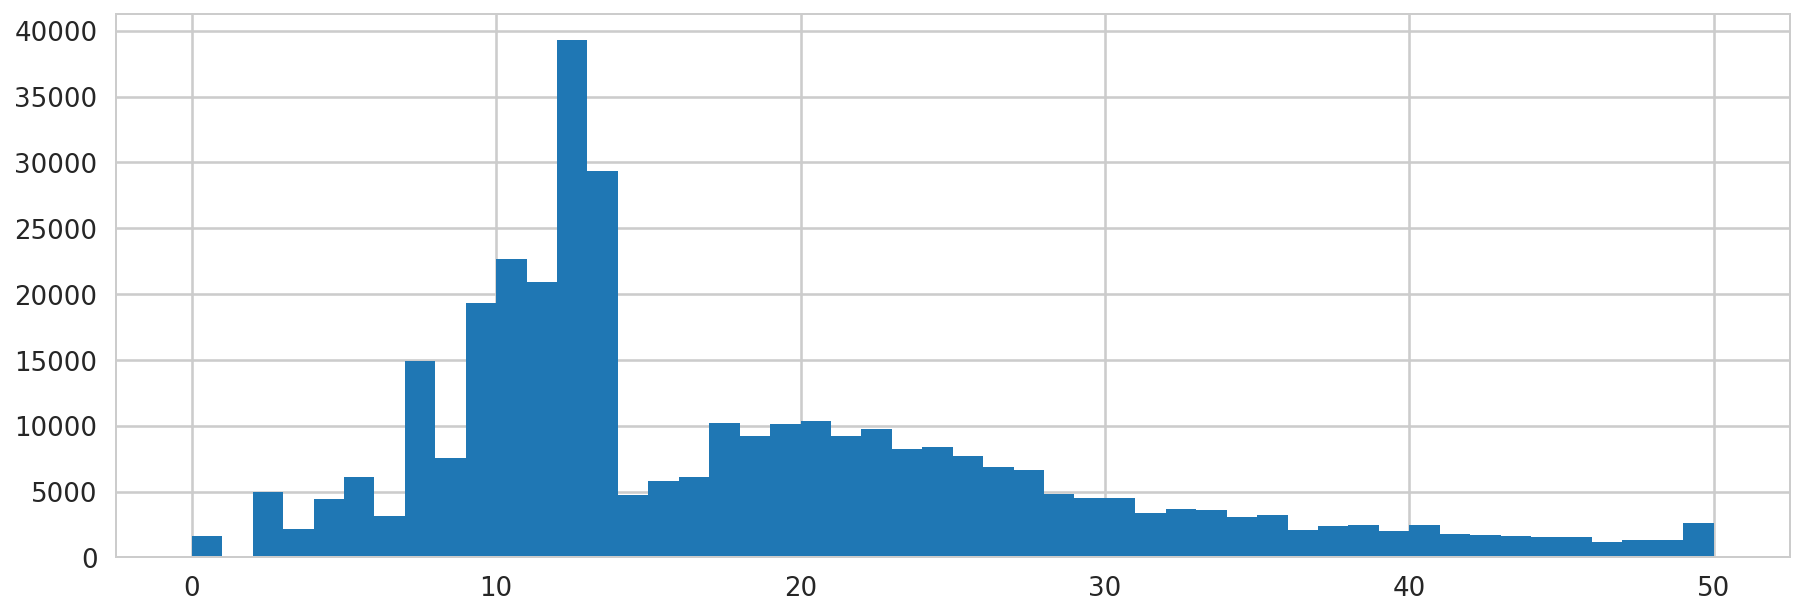

In [16]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5) # controls the size of the plot
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

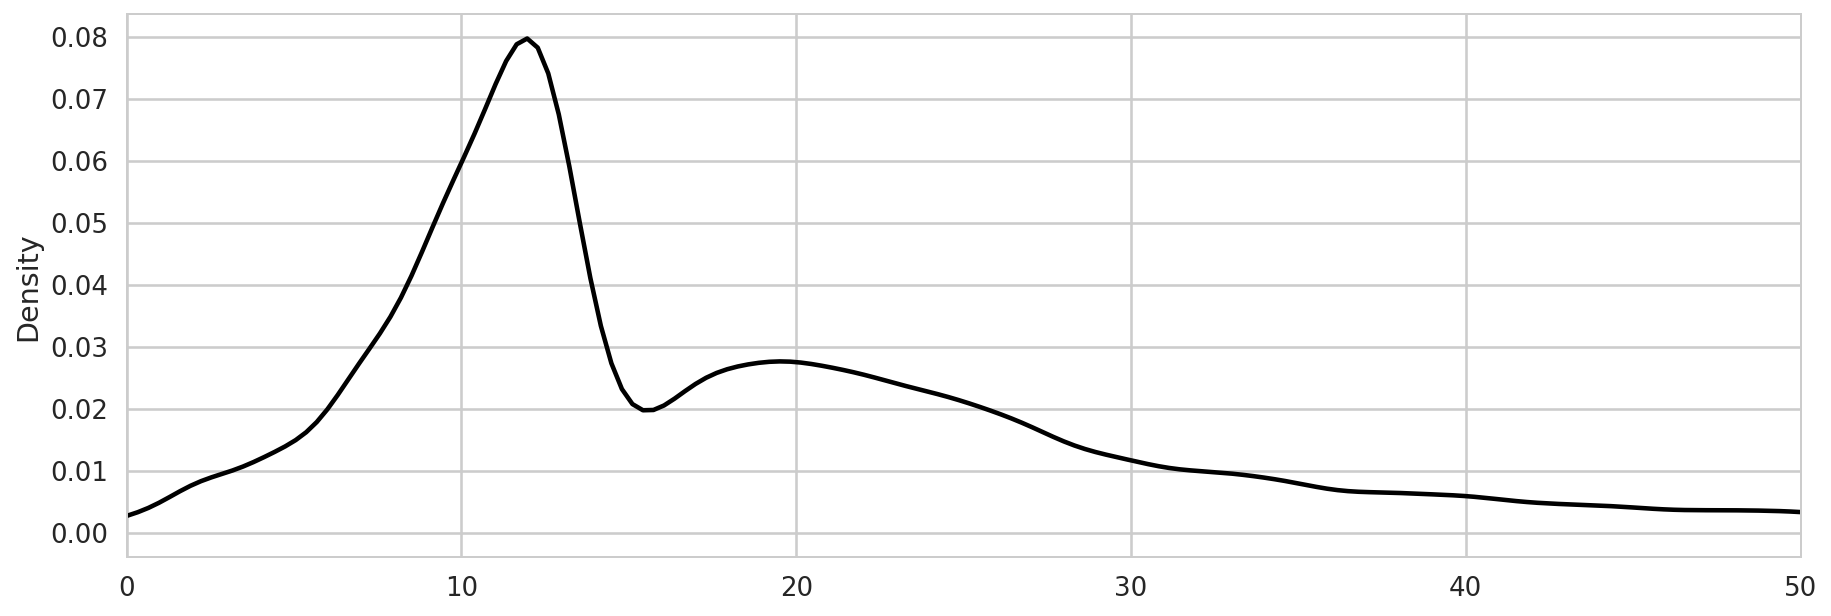

In [17]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [18]:
restaurants["GRADE DATE"].head(10)

0    04/05/2017
1    07/02/2018
2    06/14/2018
3           NaN
4    02/05/2016
5    01/04/2017
6           NaN
7           NaN
8           NaN
9           NaN
Name: GRADE DATE, dtype: object

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [19]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [20]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [21]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

INSPECTION DATE           GRADE DATE          RECORD DATE
count                380093               190577               380093
unique                 1344                 1261                    1
top     1900-01-01 00:00:00  2018-07-10 00:00:00  2018-10-17 00:00:00
freq                   1223                  554               380093
first   1900-01-01 00:00:00  2012-05-01 00:00:00  2018-10-17 00:00:00
last    2018-10-15 00:00:00  2018-10-15 00:00:00  2018-10-17 00:00:00

#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

In [ ]:
# your code here

#### Solution

In [ ]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

In [ ]:
restaurants['GRADE DATE'].hist()

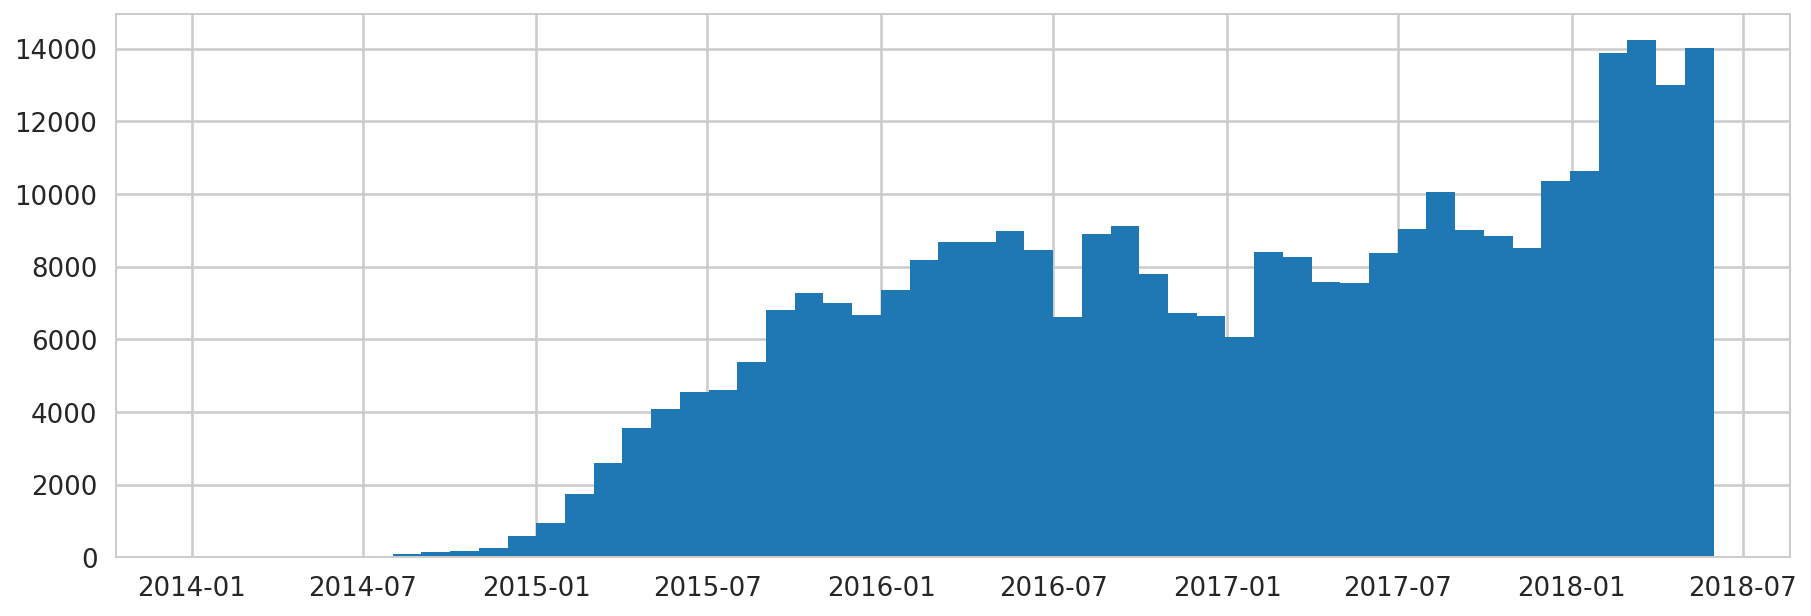

In [22]:
restaurants['INSPECTION DATE'].hist(
    range = ('1/1/2014','5/31/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 53, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

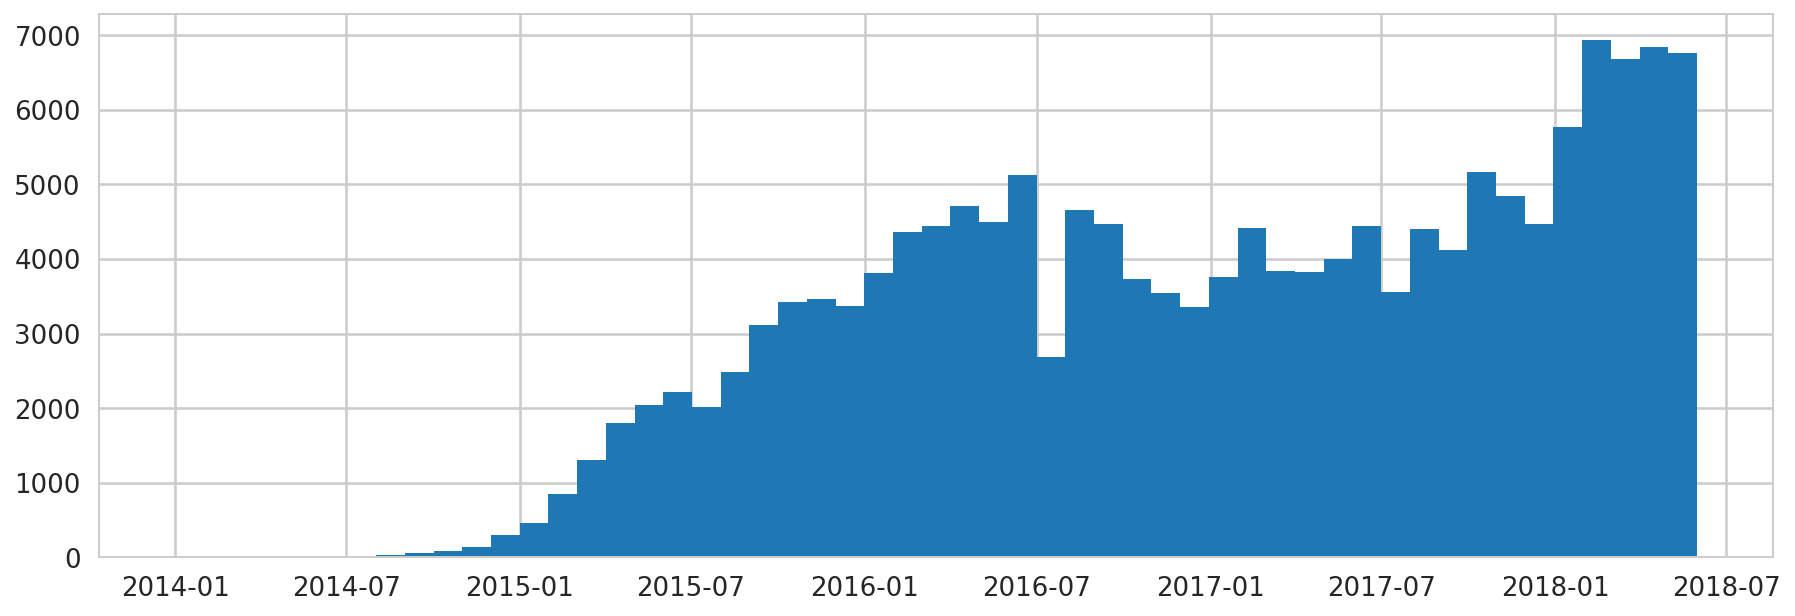

In [23]:
restaurants['GRADE DATE'].hist(
    range = ('1/1/2014','5/31/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 53, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [24]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [25]:
restaurants["DBA"].value_counts()[:10] 

DUNKIN' DONUTS                           4071
SUBWAY                                   3125
MCDONALD'S                               2278
STARBUCKS                                2101
DUNKIN' DONUTS, BASKIN ROBBINS           1324
KENNEDY FRIED CHICKEN                    1275
DOMINO'S                                 1122
BURGER KING                              1021
CROWN FRIED CHICKEN                      1020
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     891
Name: DBA, dtype: int64

In [26]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                                            83034
Chinese                                                             39612
CafÃ©/Coffee/Tea                                                    17281
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    17003
Pizza                                                               16955
Name: CUISINE DESCRIPTION, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

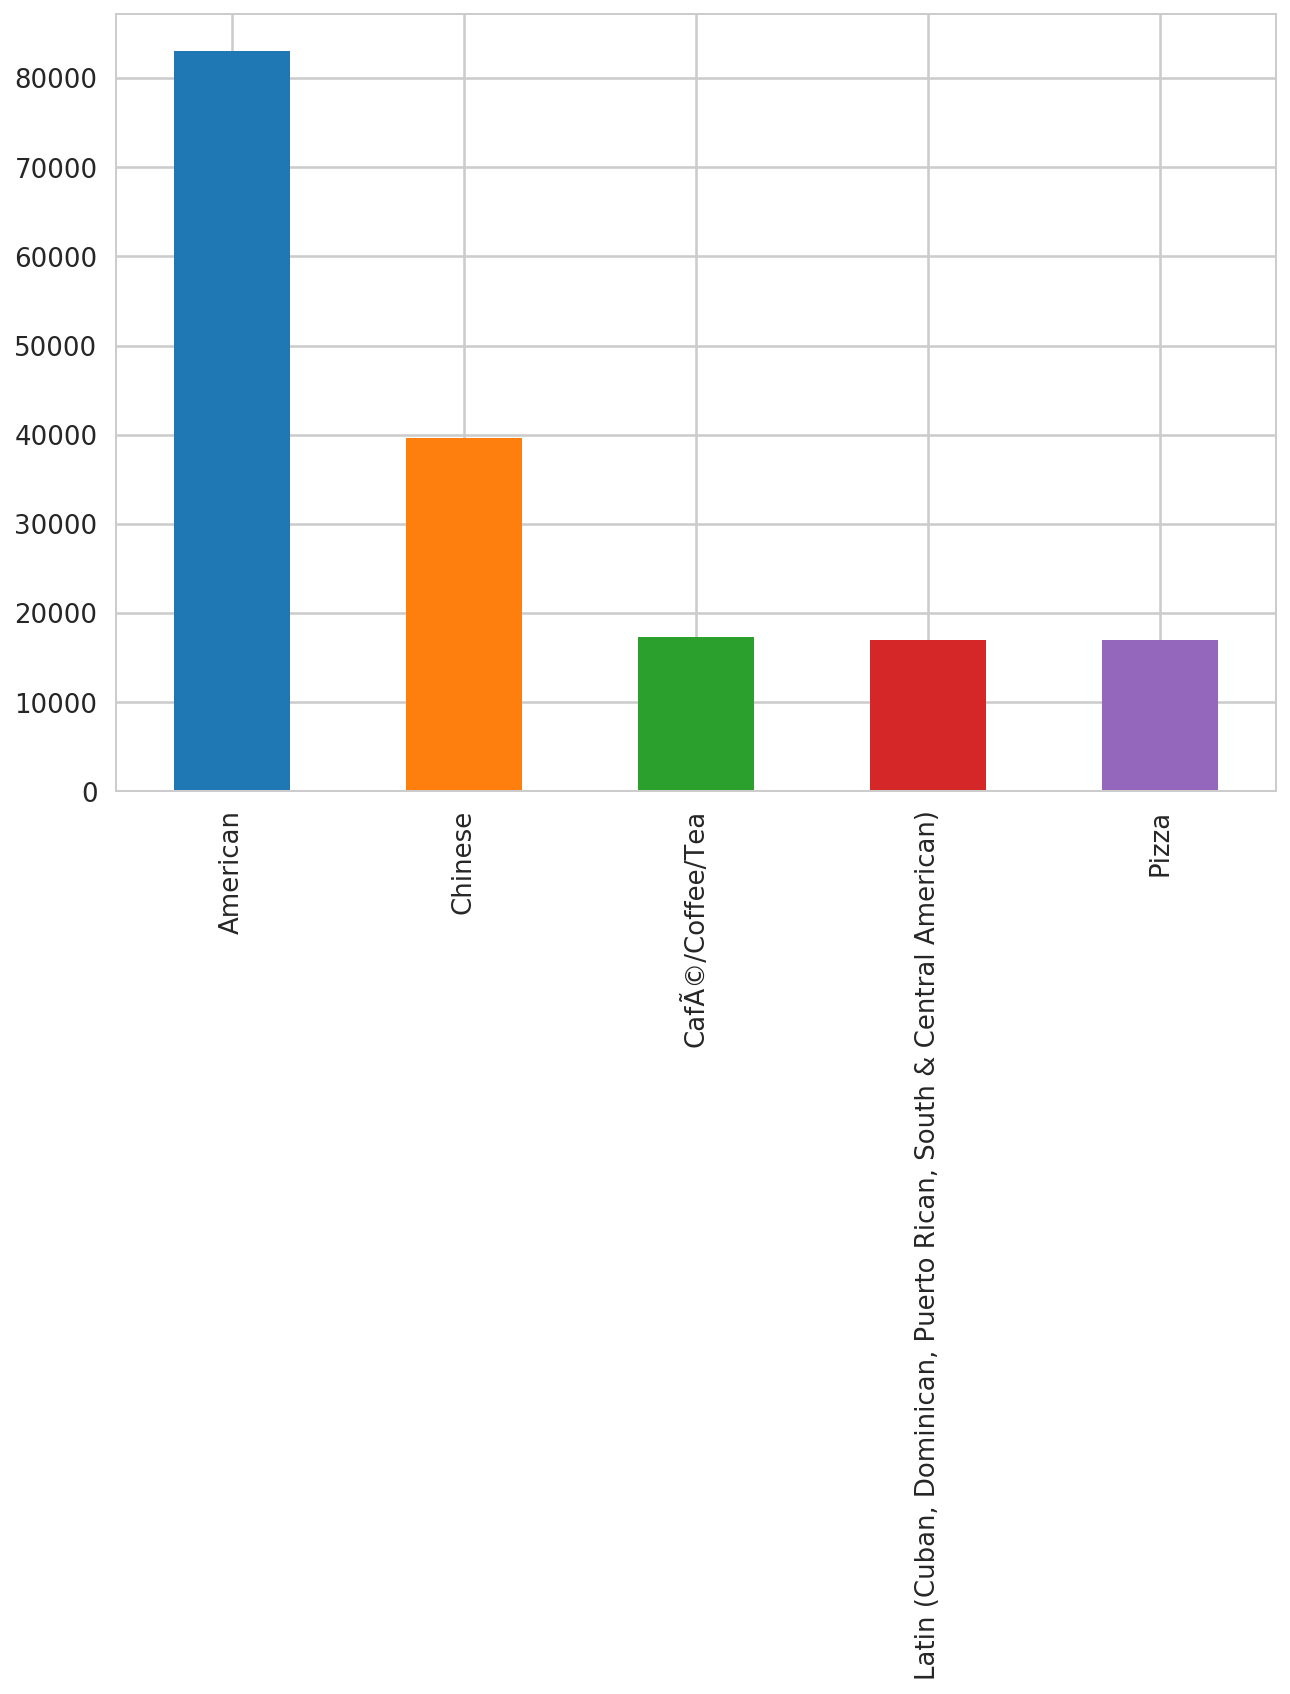

In [27]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [28]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American                                                            83034
Chinese                                                             39612
CafÃ©/Coffee/Tea                                                    17281
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    17003
Pizza                                                               16955
Italian                                                             15745
Mexican                                                             15295
Japanese                                                            13421
Caribbean                                                           13192
Bakery                                                              11540
Spanish                                                             11359
Pizza/Italian                                                        8289
Chicken                                                              6552
Indian                                

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [29]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [30]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)


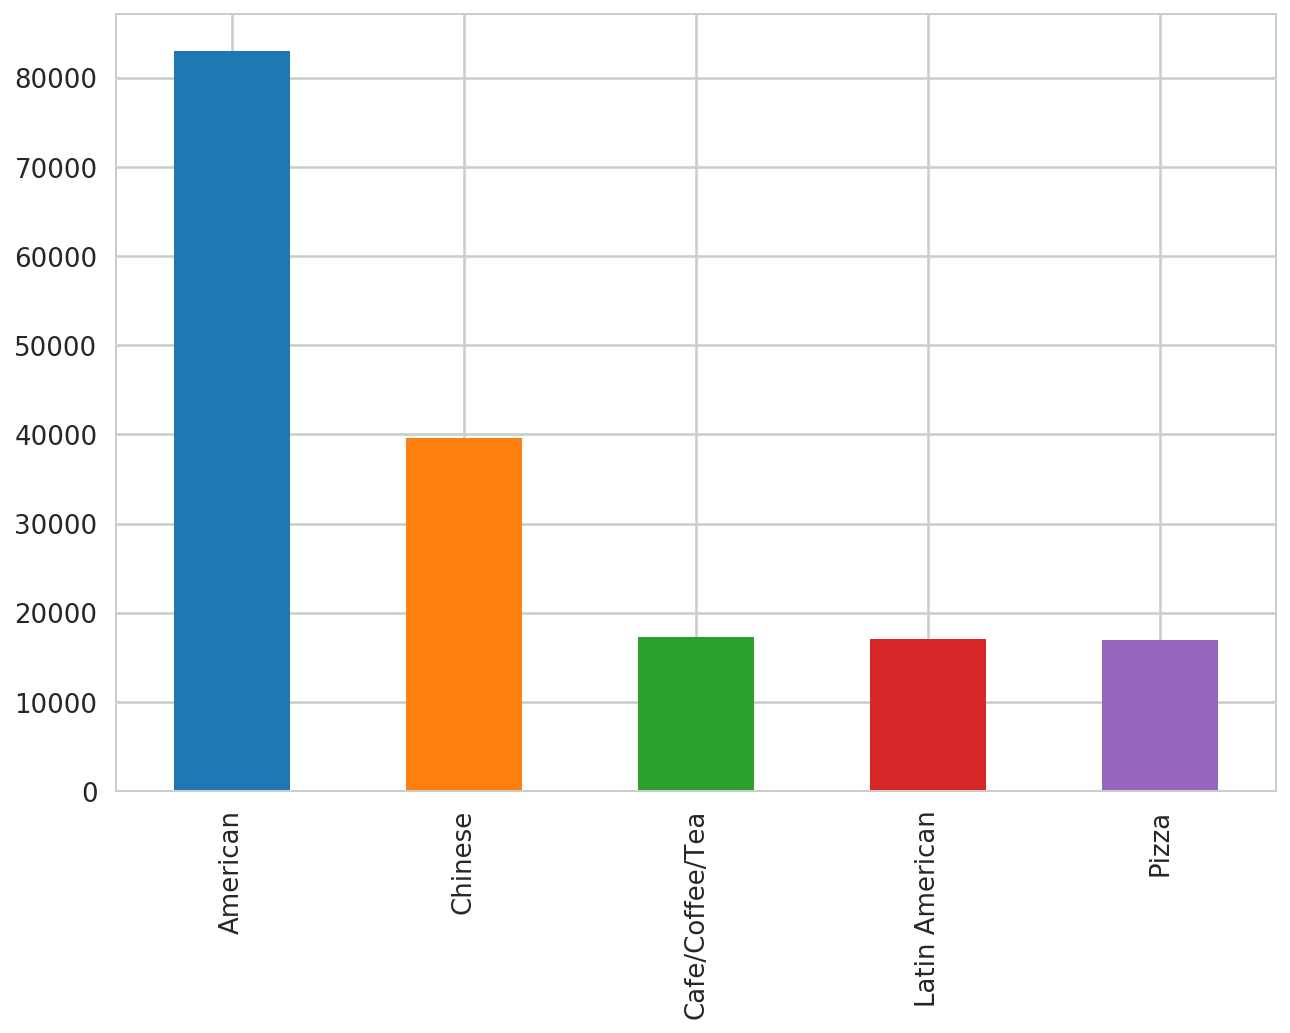

In [31]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

In [32]:
restaurants["VIOLATION CODE"].head(5)

0    02G
1    10B
2    10F
3    16D
4    09B
Name: VIOLATION CODE, dtype: category
Categories (98, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [33]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    53189
08A    40374
04L    27175
06D    25633
06C    25275
02G    23244
10B    22486
04N    20427
02B    19361
04H     8201
Name: VIOLATION CODE, dtype: int64

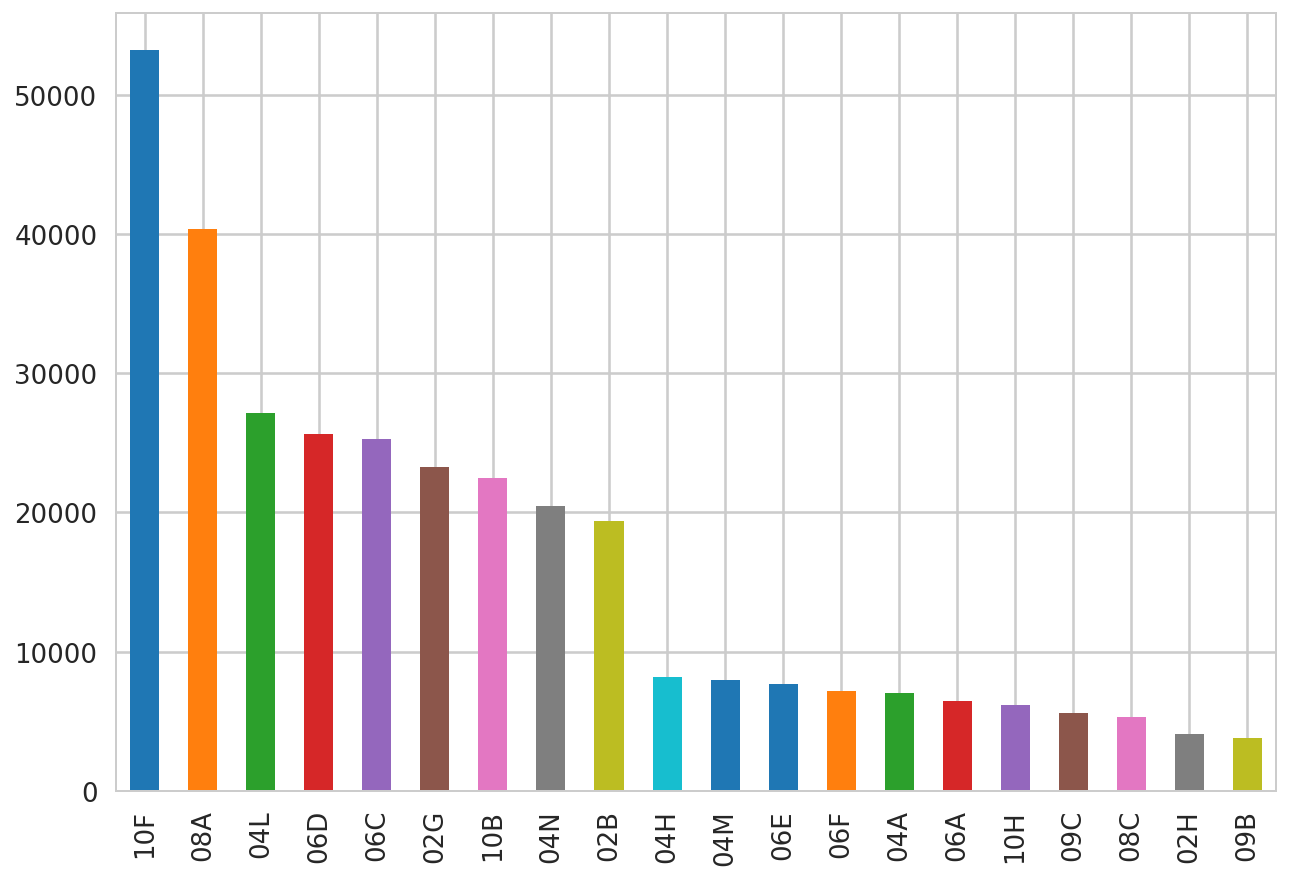

In [34]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across boroughs.

In [ ]:
# your code here

#### Solution 

In [38]:
restaurants['BORO'].value_counts()

MANHATTAN        150247
BROOKLYN          96879
QUEENS            85604
BRONX             34100
STATEN ISLAND     13245
Missing              18
Name: BORO, dtype: int64

In [37]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

MANHATTAN        150247
BROOKLYN          96879
QUEENS            85604
BRONX             34100
STATEN ISLAND     13245
Missing              18
Name: BORO, dtype: int64

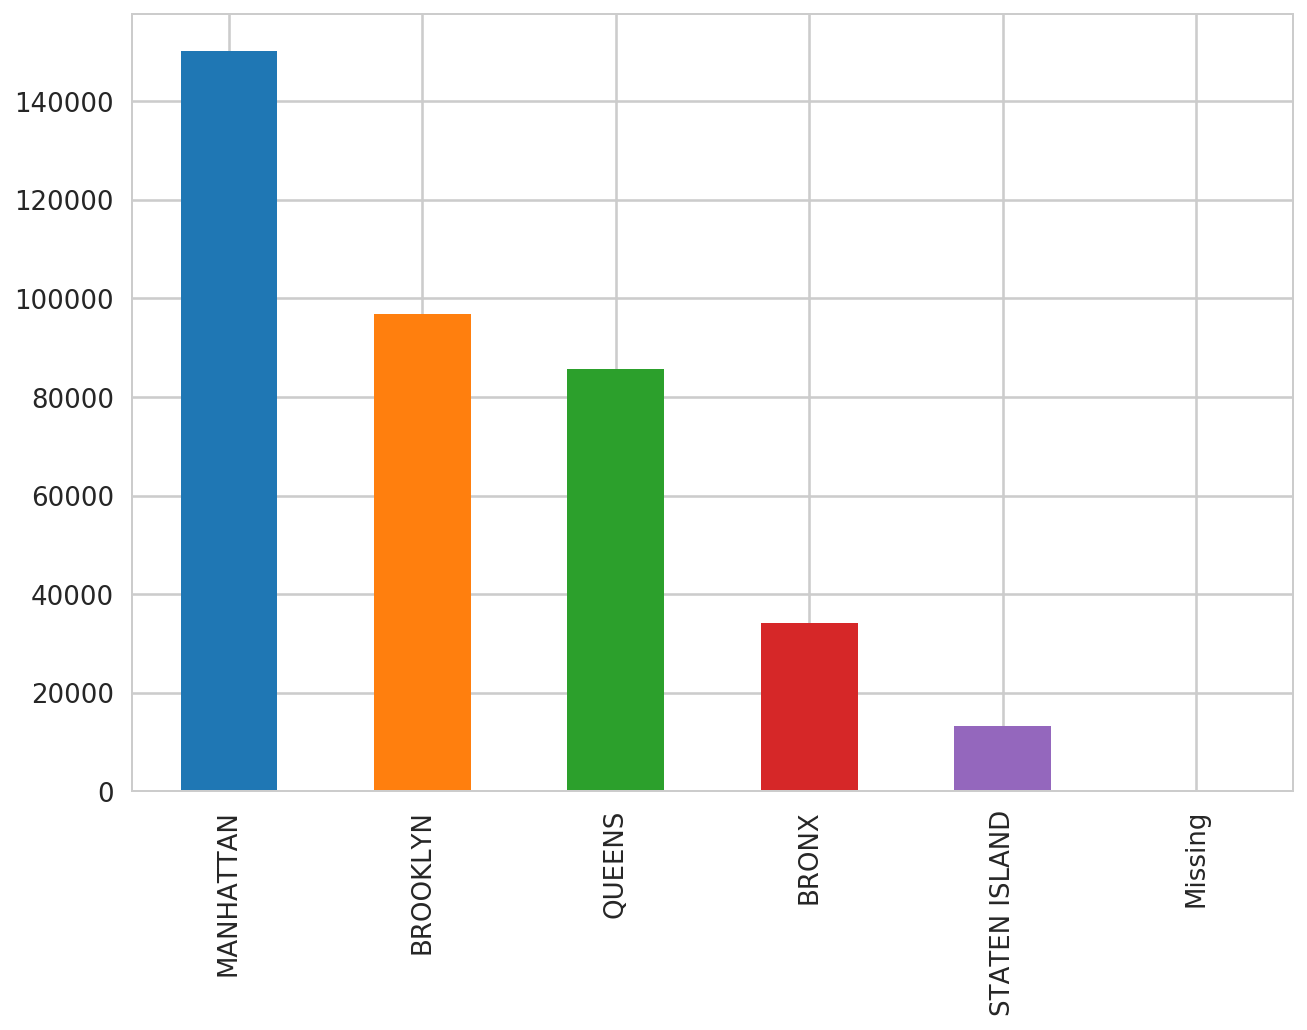

In [36]:
restaurants['BORO'].value_counts().plot(kind='bar')

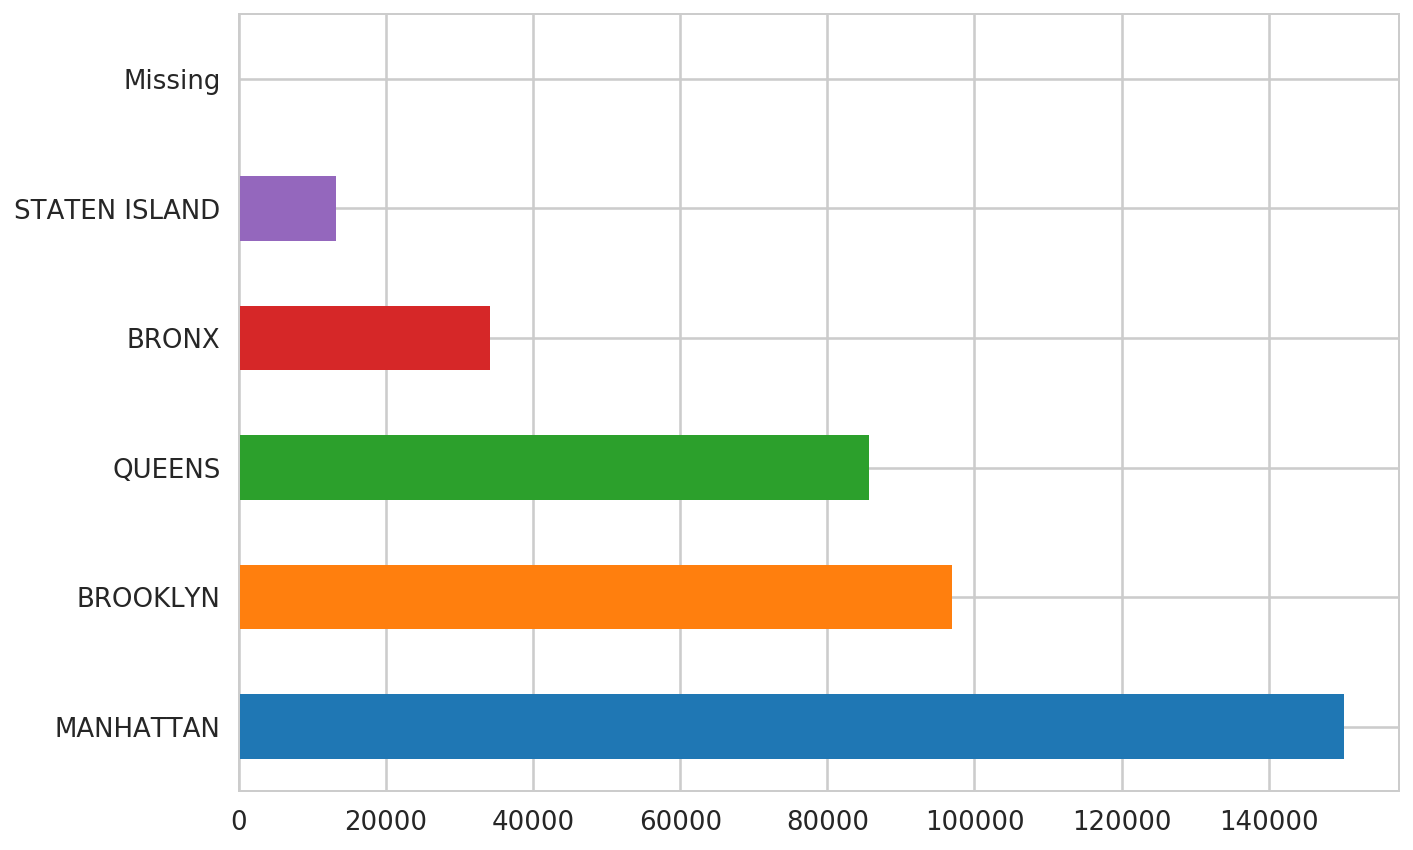

In [35]:
restaurants['BORO'].value_counts().plot(kind='barh')

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [39]:
column_list = ["INSPECTION DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ column_list ].head(10)

INSPECTION DATE VIOLATION CODE                                       DBA  \
0      2017-04-05            02G                                 BARBOUNIA   
1      2018-07-02            10B                 JOE'S SHANGHAI RESTAURANT   
2      2018-06-14            10F                         JACK'S WIFE FREDA   
3      2017-07-14            16D                              ATOMIC WINGS   
4      2016-02-05            09B  WOOLWORTH TOWER KITCHEN/THE WOOLY PUBLIC   
5      2017-01-04            06E                    RIVER DOCK BAR & GRILL   
6      2017-05-15            04L                                 PASTA WIZ   
7      2015-09-10            08A                           DELUXE GREEN BO   
8      2016-09-09            10F                                   JUPIOCA   
9      2017-06-29            04K                       GOLDEN GATE EXPRESS   

   SCORE  
0   13.0  
1   17.0  
2   10.0  
3    NaN  
4   20.0  
5   10.0  
6   45.0  
7   42.0  
8    2.0  
9   21.0

In [40]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA"] ].head(5)

GRADE DATE VIOLATION CODE                                       DBA
0 2017-04-05            02G                                 BARBOUNIA
1 2018-07-02            10B                 JOE'S SHANGHAI RESTAURANT
2 2018-06-14            10F                         JACK'S WIFE FREDA
3        NaT            16D                              ATOMIC WINGS
4 2016-02-05            09B  WOOLWORTH TOWER KITCHEN/THE WOOLY PUBLIC

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [41]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29        False
          ...  
380063    False
380064    False
380065    False
380066    False
380067    False
380068    False
380069    False
380070    False
380071    False
380072    False
380073     True
380074    False
380075    False
380076    False
380077    False
380078    False
380079    False
380080    False
380081    False
380082    False
380083    False
380084     True
380085    False
380086     True
380087    False
380088     True
380089    False
380090     True
380091     True
380092    False
Name: VIOLATION CODE, Le

In [42]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

CAMIS                                DBA           BORO BUILDING  \
6       50058275                          PASTA WIZ       BROOKLYN       58   
21      50043744              CARIBBEAN COFFEE SHOP       BROOKLYN      527   
28      50072274          TIC-TAC-TOE BAKERY & MORE       BROOKLYN     9303   
53      40850087                   MADAME TUSSAUD'S      MANHATTAN      234   
57      50071004                             SPOONS       BROOKLYN     5001   
65      41479962                           CHOCOLAT      MANHATTAN     2217   
73      40388260                 AMNON KOSHER PIZZA       BROOKLYN     4814   
77      50067617                            RIBALTA      MANHATTAN        2   
99      40369087                BLUE BAY RESTAURANT          BRONX     3533   
106     50043344        HALAL INDIAN FOOD & FALAFEL       BROOKLYN     6742   
125     41530881            MARCO POLO PIZZA & DELI      MANHATTAN     1289   
139     50042596                    KENTA SUSHI BAR         QUEENS     3923   
149     40943306     BEST-BITES RESTAURANT & BAKERY       BROOKLYN     4601   
159     41392209                LA RIOJA RESTAURANT         QUEENS     3305   
166     40923811                         BLACK DOOR      MANHATTAN      127   
167     40589507                 CONNECTICUT MUFFIN       BROOKLYN      206   
220     50046283                     HUMMUS KITCHEN      MANHATTAN      444   
225     50002064               PRIMAVERA RESTAURANT       BROOKLYN      623   
227     41481717             PJ RESTAURANT & BAKERY       BROOKLYN     1339   
243     41198338                             ROYALE      MANHATTAN      157   
260     50064524                         REGO PIZZA         QUEENS     9116   
319     41543738                        NEW DYNASTY      MANHATTAN      393   
350     50009619          POPEYES LOUISIANA KITCHEN         QUEENS    12210   
353     41076270                          CITY PERK      MANHATTAN       15   
358     50052499                        LAMOZA CAFE       BROOKLYN     7704   
365     50015534               MANGIA FRESH KITCHEN  STATEN ISLAND       20   
389     41360136               BUTTERFIELD CATERING      MANHATTAN      346   
404     41540529      PERIDANCE CAPEZIO CENTER CAFE      MANHATTAN      126   
415     50051873                        BELLA PIZZA         QUEENS    13462   
418     50048795                 MEZZE CAFE AND BAR      MANHATTAN      210   
...          ...                                ...            ...      ...   
379791  41400742                        BURGER KING          BRONX     3500   
379792  50057566                           DOMINO'S         QUEENS   24722D   
379818  41241802                    NICK'S LOBSTERS       BROOKLYN     2777   
379827  41522735               COURT STREET GROCERS       BROOKLYN      485   
379848  41679329                   BEST COFFEE SHOP       BROOKLYN     4410   
379849  50059943         LINDA'S WINGK BOY PIZZERIA          BRONX      729   
379862  41505368                          KING FOOD      MANHATTAN      489   
379872  50043278                BUBBLE TEA & CREPES      MANHATTAN      251   
379914  41352974          SAKURA 6 JAPANESE CUISINE       BROOKLYN      837   
379916  41236123                    LA SALLE BAKERY          BRONX     3139   
379927  40972759               GATE WAY BEER GARDEN       BROOKLYN     3162   
379938  41435697                     FRANK'S TAVERN       BROOKLYN     5511   
379947  41227184                        STICKY RICE      MANHATTAN       85   
379962  50046701                  MOUNT HOPE BAKERY          BRONX        9   
379967  50079007              MILE END DELICATESSEN       BROOKLYN      97A   
379970  41211538                                STK      MANHATTAN       28   
379979  40988630                           REVISION      MANHATTAN      219   
379992  50001956         GOLDEN FOUNTAIN RESTAURANT          BRONX     3925   
380008  50069855                   FERRY HOUSE CAFE      MANH

In [43]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   213
DUNKIN' DONUTS                           159
KENNEDY FRIED CHICKEN                    121
CROWN FRIED CHICKEN                      106
DOMINO'S                                  80
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     78
STARBUCKS                                 75
POPEYES LOUISIANA KITCHEN                 67
MCDONALD'S                                64
DUNKIN' DONUTS, BASKIN ROBBINS            62
BURGER KING                               50
CARVEL ICE CREAM                          35
KFC                                       34
LE PAIN QUOTIDIEN                         31
LITTLE CAESARS                            27
AMC THEATRES                              25
VIVI BUBBLE TEA                           24
CHIPOTLE MEXICAN GRILL                    23
BAREBURGER                                23
SILVER KRUST WEST INDIAN RESTAURANT       22
Name: DBA, dtype: int64

In [44]:
has_mice["CAMIS"].value_counts()[:5]

50017257    12
50016943    11
41259444    11
40850055    11
41300049    10
Name: CAMIS, dtype: int64

In [46]:
condition = (restaurants["CAMIS"] == '41444879')
restaurants[condition]

Empty DataFrame
Columns: [CAMIS, DBA, BORO, BUILDING, STREET, ZIPCODE, PHONE, CUISINE DESCRIPTION, INSPECTION DATE, ACTION, VIOLATION CODE, VIOLATION DESCRIPTION, CRITICAL FLAG, SCORE, GRADE, GRADE DATE, RECORD DATE, INSPECTION TYPE]
Index: []

And we can use more complex conditions. 

In [47]:
mice_manhattan =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "MANHATTAN") 
                    & (restaurants["ZIPCODE"] == "10012") )

In [48]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

CAMIS                                                DBA  \
1315    40369878                           VILLA MOSCONI RESTAURANT   
1746    40923544                                         TEMPLE BAR   
3202    40380648                             PORTO BELLO RESTAURANT   
4026    40943105  NEW YORK UNIVERSITY - KIMMEL STUDENT CENTER (C...   
4064    50039007              COURT STREET GROCER'S LAGUARDIA PLACE   
4074    40568734                                BLEECKER STREET BAR   
5991    50016892                                          THE FOLLY   
9011    50069543                                           TOP THAI   
9448    41235245                            LA LANTERNA DI VITTORIO   
11465   40573141                                   PEPE ROSSO TO GO   
11606   50011127                                        MINT MASALA   
11741   41314548                                       THINK COFFEE   
12627   40723269                                            PEASANT   
13569   50013284                                          SOHO ROOM   
14329   41117553                                    EPISTROPHY CAFE   
14962   40362274                               ANGELIKA FILM CENTER   
15117   50063752                                           GOA TACO   
15880   41478531                                       THE RED LION   
18329   50035310                                              DANTE   
18381   41444651                                           TRIONA'S   
18910   50077080                                      BAO TEA HOUSE   
19985   41217679                                       LUXOR LOUNGE   
20832   50018106                                   ONCE UPON A TART   
21679   41353612                                         SOHO SUSHI   
21687   40947919                                   DOS CAMINOS SOHO   
22188   40861201                                         RED BAMBOO   
24055   41476013                                     VESUVIO BAKERY   
24662   41660639                       CAFETAL SOCIAL CLUB/ CHACHIS   
24763   50057386                                         Chow House   
25521   41689018                                            COCORON   
...          ...                                                ...   
349911  41133245                                          PEGU CLUB   
351579  40550155                                      PARISI BAKERY   
352727  41689018                                            COCORON   
352803  40392685                                    DOJO RESTAURANT   
352833  50037940                                       MOCHA BURGER   
353352  41563445                                         GMT TAVERN   
355832  40380648                             PORTO BELLO RESTAURANT   
355841  41660639                       CAFETAL SOCIAL CLUB/ CHACHIS   
356588  41648237                                GONZALEZ Y GONZALEZ   
358292  41406564                                           DE MARIA   
359593  41478531                                       THE RED LION   
359637  50046085                                  GO ZEN RESTAURANT   
360467  40704635                                        BEN'S PIZZA   
360565  40365348                                         PANCHITO'S   
362094  50039007              COURT STREET GROCER'S LAGUARDIA PLACE   
364068  50069752                          MACDOUGAL STREET ALEHOUSE   
367609  50007103                                      CARROLL PLACE   
367862  50000598                                        UNCLE TED'S   
369454  40362274                               ANGELIKA FILM CENTER   
369511  40373888                                          IL MULINO   
369600  40392685                                    DOJO RESTAURANT   
370147  41243023                                              SHUKA   
372593  41161346                                          LE BASKET   
372829  41117553                                    EPISTROPHY CAFE   
373002  50018822                   

In [49]:
has_mice_10012["DBA"].value_counts()[:20]

PORTO BELLO RESTAURANT          9
COCO & CRU/SWEETWATER SOCIAL    7
LITTLE RASCAL                   6
INSOMNIA COOKIES                6
SUSHI SUSHI                     6
MONTE'S                         6
TRIONA'S                        6
DOJO RESTAURANT                 6
LITTLE CUPCAKE BAKE SHOP        5
KOPI KOPI                       5
THINK COFFEE                    5
OLD TBILISI                     5
COCORON                         5
DUMPLING KINGDOM                5
MOCHA BURGER                    5
BY CHLOE                        5
GO ZEN RESTAURANT               5
UNCLE TED'S                     5
BEN'S PIZZA                     5
EPISTROPHY CAFE                 5
Name: DBA, dtype: int64

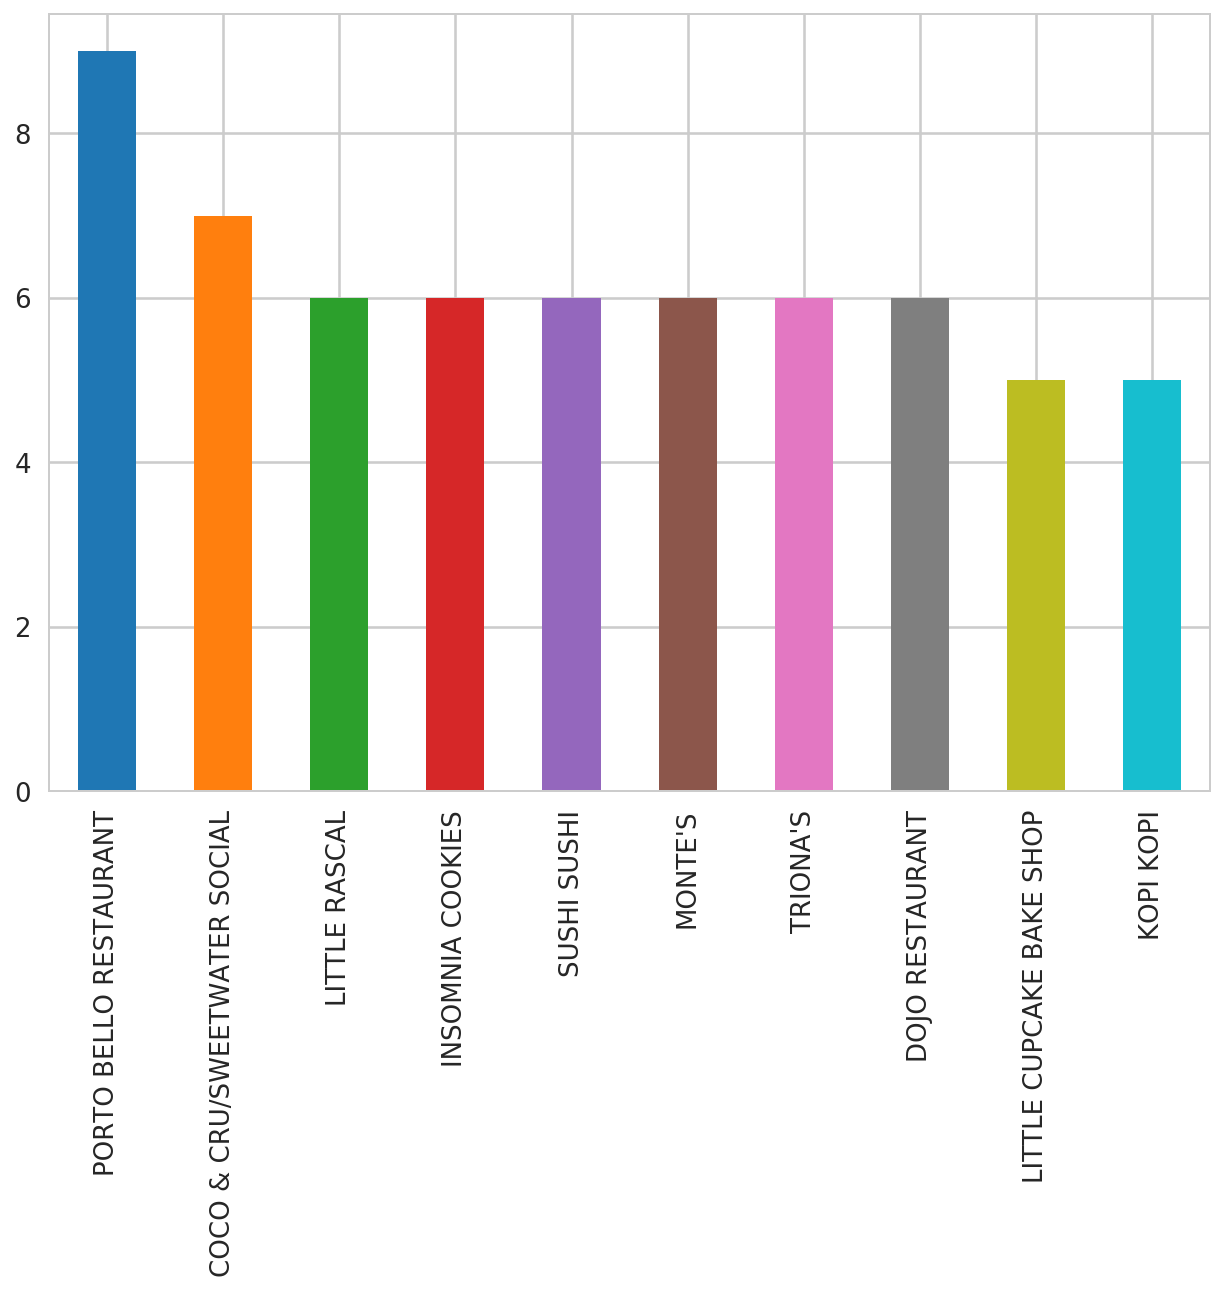

In [50]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='bar')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [51]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [52]:
pivot

CAMIS
INSPECTION DATE       
1900-01-01        1223
2011-10-07           1
2012-05-01           2
2013-04-19           4
2013-06-07           1
2013-06-15           1
2013-10-22           2
2013-11-15           1
2014-03-06           1
2014-04-21           2
2014-07-21           1
2014-07-29           1
2014-08-01           4
2014-08-05          15
2014-08-07           9
2014-08-08           3
2014-08-12           1
2014-08-13           6
2014-08-14          11
2014-08-16           3
2014-08-19           2
2014-08-20           4
2014-08-21           4
2014-08-22           1
2014-08-26          20
2014-08-27           7
2014-08-28          19
2014-08-30           1
2014-09-02          10
2014-09-03           7
...                ...
2018-09-11         512
2018-09-12         550
2018-09-13         566
2018-09-14         458
2018-09-15          67
2018-09-17         644
2018-09-18         731
2018-09-19         766
2018-09-20         830
2018-09-21         445
2018-09-22          59
2018-09-23           6
2018-09-24         720
2018-09-25         765
2018-09-26         833
2018-09-27         928
2018-09-28         564
2018-09-29         170
2018-10-01         684
2018-10-02         783
2018-10-03         889
2018-10-04         852
2018-10-05         306
2018-10-06         107
2018-10-09         649
2018-10-10         885
2018-10-11         793
2018-10-12         471
2018-10-13          71
2018-10-15         537

[1344 rows x 1 columns]

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

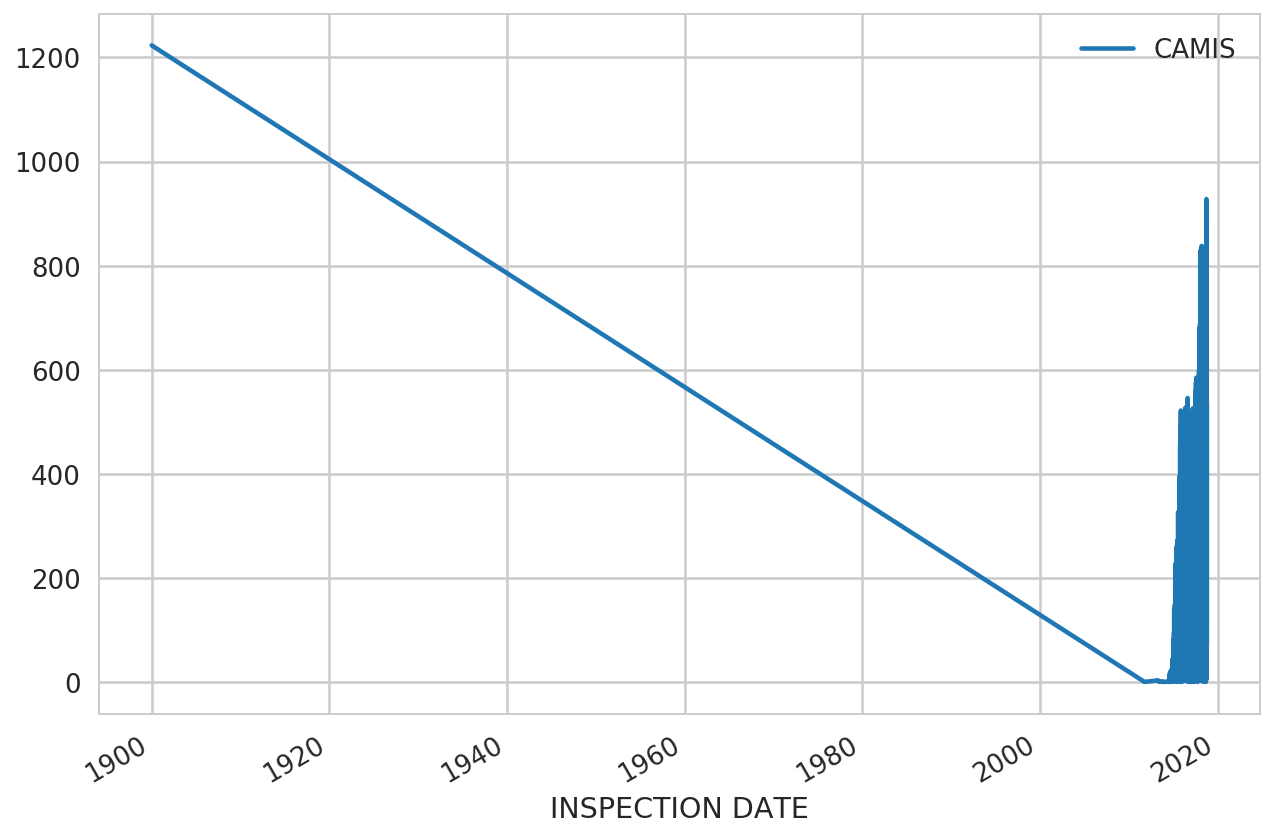

In [53]:
pivot.plot()

In [54]:
pivot.head(5)

CAMIS
INSPECTION DATE       
1900-01-01        1223
2011-10-07           1
2012-05-01           2
2013-04-19           4
2013-06-07           1

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [ ]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

And let's plot again.

In [ ]:
pivot.plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample('7D').mean()

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('7D').mean().plot()

In [ ]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

In [ ]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis='columns')

In [ ]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean()

In [ ]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot()

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month

### (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the 
# number of unique items in a list x 
def count_unique(x):
    return len(set(x))

# We break down by BORO and GRADE, and also calculate 
# inspections in unique (unique restaurants) 
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data = restaurants, #
    index = 'GRADE DATE', 
    columns = ['BORO', 'GRADE'],
    values = 'CAMIS', 
    aggfunc = ['count', count_unique]
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample('1M').sum()

# Show the last 5 entries and show the transpose (.T) 
agg.tail().T

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
pivot = pd.pivot_table(
data = restaurants,
index = 'INSPECTION DATE',
values = 'SCORE',
aggfunc = ['mean','count'])
pivot.plot(figsize=(10,4))

In [ ]:
pivot.resample('1W').mean().plot()



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

## Exercise: NYPD Vehicle Collisions

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


### Task 1: 

Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 


In [55]:
# Fetches the most recent dataset and stores it under the folder data
# only works for jupyter notebook
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o data/accidents.csv
# Compresses the text file, both for saving space and for loading faster
3!gzip data/accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  288M    0  288M    0     0  1869k      0 --:--:--  0:02:37 --:--:-- 2018k      0 --:--:--  0:00:24 --:--:-- 1693k4k      0 --:--:--  0:02:16 --:--:-- 1995k


In [1]:
import gzip
import pandas as pd
with gzip.open('data/accidents.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.to_csv('accidents.csv')

#### Solution

In [ ]:
# It is a big file, ~270Mb. It will take 2-3 minutes to download
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -o accidents.csv

In [ ]:
df = pd.read_csv("accidents.csv", low_memory=False)

In [ ]:
df.dtypes


### Task 2: 

Find out the most common contributing factors to the collisions. 
 

In [2]:
df.head()

DATE  TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  10/09/2018  0:00   BROOKLYN    11201  40.699844 -73.991035   
1  10/09/2018  0:00   BROOKLYN    11201        NaN        NaN   
2  10/09/2018  0:00   BROOKLYN    11211  40.716064 -73.939026   
3  10/09/2018  0:00  MANHATTAN    10023  40.778477 -73.985460   
4  10/09/2018  0:00        NaN      NaN  40.657680 -73.925415   

                  LOCATION                    ON STREET NAME  \
0  (40.699844, -73.991035)  CADMAN PLAZA WEST                  
1                      NaN  old fulton street                  
2  (40.716064, -73.939026)  OLIVE STREET                       
3   (40.778477, -73.98546)  WEST END AVENUE                    
4   (40.65768, -73.925415)  REMSEN AVENUE                      

  CROSS STREET NAME OFF STREET NAME         ...          \
0    MIDDAGH STREET             NaN         ...           
1      henry street             NaN         ...           
2    MASPETH AVENUE             NaN         ...           
3    WEST 70 STREET             NaN         ...           
4               NaN             NaN         ...           

   CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                    Unspecified                            NaN   
1                    Unspecified                            NaN   
2                    Unspecified                            NaN   
3                    Unspecified                            NaN   
4                    Unspecified                            NaN   

   CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY  \
0                            NaN                            NaN     3996327   
1                            NaN                            NaN     3996325   
2                            NaN                            NaN     3996167   
3                            NaN                            NaN     3996860   
4                            NaN                            NaN     3997805   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
1  Station Wagon/Sport Utility Vehicle                                 tour   
2                                Sedan                                  NaN   
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
4  Station Wagon/Sport Utility Vehicle                                Sedan   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                  NaN                 NaN                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

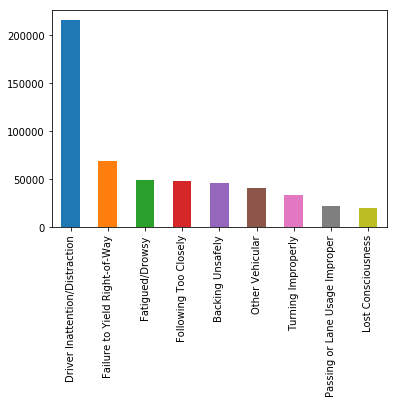

In [5]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='bar')

#### Solution

In [ ]:
# Task 2: Find out the most common contributing factors to the collisions.
# Notice that we skip the first element (0) of the list, and we get the elements 1:10
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

### Task 3: 

Break down the number of collisions by borough.





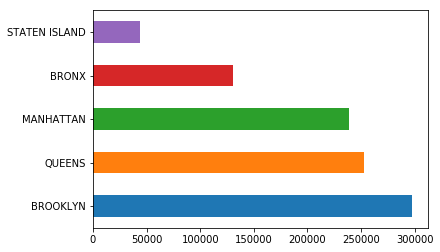

In [6]:
df.BOROUGH.value_counts().plot(kind='barh')

#### Solution

In [ ]:
# Task 3: Break down the number of collisions by borough.
df['BOROUGH'].value_counts().plot(kind='barh')

### Task 4

Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

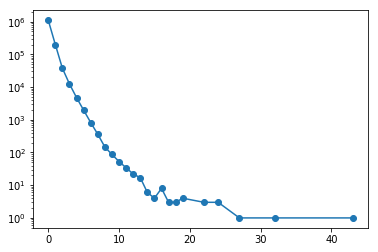

In [19]:
(df['NUMBER OF PERSONS INJURED']
 .value_counts()
 .sort_index() #do sort_index to sort according to index, not value
 .plot(
     kind='line',
     marker='o',
     logy=True)
) 

#### Solution

In [ ]:
# "Chain" style of writing data maniputation operations
plot = (
    df['NUMBER OF PERSONS INJURED'] # We analyze people injured
    .value_counts() # Count how many accidents had this number of injuries
    .sort_index() # Sort the x-axis
    .plot( 
        # kind='bar', # Create a bar plot
        logy=True # Make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions")
plot.set_title("Analysis of number of injuries per collision")

### Task 5

Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

In [22]:
pivot = pd.pivot_table(
    data = df, #
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
)
pivot

BOROUGH                                               BRONX  BROOKLYN  \
CONTRIBUTING FACTOR VEHICLE 1                                           
Accelerator Defective                                  76.0     138.0   
Aggressive Driving/Road Rage                          593.0     942.0   
Alcohol Involvement                                  1290.0    2521.0   
Animals Action                                         65.0     122.0   
Backing Unsafely                                     5058.0   10564.0   
Brakes Defective                                      452.0     819.0   
Cell Phone (hand-Held)                                  7.0       6.0   
Cell Phone (hand-held)                                 26.0      47.0   
Cell Phone (hands-free)                                15.0      56.0   
Driver Inattention/Distraction                      16631.0   37446.0   
Driver Inexperience                                  1688.0    3625.0   
Driverless/Runaway Vehicle                             76.0     138.0   
Drugs (Illegal)                                        85.0     134.0   
Drugs (illegal)                                         4.0       7.0   
Eating or Drinking                                      NaN       1.0   
Failure to Keep Right                                 191.0     485.0   
Failure to Yield Right-of-Way                        5136.0   16873.0   
Fatigued/Drowsy                                      2354.0    7903.0   
Fell Asleep                                           209.0     553.0   
Following Too Closely                                2810.0    5970.0   
Glare                                                 353.0     521.0   
Headlights Defective                                    6.0      22.0   
Illnes                                                  5.0      18.0   
Illness                                               217.0     526.0   
Lane Marking Improper/Inadequate                       63.0      68.0   
Lost Consciousness                                   1180.0    5041.0   
Obstruction/Debris                                    220.0     399.0   
Other Electronic Device                               240.0     524.0   
Other Lighting Defects                                  7.0      30.0   
Other Vehicular                                      5180.0    5661.0   
Outside Car Distraction                               840.0    2013.0   
Oversized Vehicle                                     636.0    2264.0   
Passenger Distraction                                 697.0    1506.0   
Passing Too Closely                                   450.0     860.0   
Passing or Lane Usage Improper                       1873.0    3825.0   
Pavement Defective                                    127.0     327.0   
Pavement Slippery                                    1343.0    2379.0   
Pedestrian/Bicyclist/Other Pedestrian Error/Con...    423.0     738.0   
Physical Disability                                   739.0    2661.0   
Prescription Medication                              1470.0    3789.0   
Reaction to Other Uninvolved Vehicle                  547.0    1262.0   
Reaction to Uninvolved Vehicle                         96.0     157.0   
Shoulders Defective/Improper                           10.0       4.0   
Steering Failure                                      138.0     303.0   
Texting                                                 NaN       1.0   
Tinted Windows                                          3.0       2.0   
Tire Failure/Inadequate                                95.0     173.0   
Tow Hitch Defective                                    12.0      28.0   
Traffic Control Device Improper/Non-Working            52.0     123.0   
Traffic Control Disregarded                          1860.0    4177.0   
Turning Improperly                                   2652.0    4845.0   
Unsafe Lane Changing                                 1316.0    1937.0   
Unsafe Speed                                          795.

In [20]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data = df, # we analyze the df (accidents) dataframe
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
)
pivot

### Task 6

Find the dates with the most accidents. Can you figure out what happened on these days? 


In [23]:
df.DATE.value_counts()

01/21/2014    1161
12/15/2017     994
05/19/2017     964
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     905
01/07/2017     895
12/14/2017     880
03/02/2018     874
09/30/2016     872
11/26/2013     867
04/28/2017     854
03/08/2013     851
10/21/2016     851
06/29/2018     843
06/22/2017     840
03/16/2017     834
10/27/2016     831
03/05/2015     830
06/13/2017     822
06/14/2018     821
10/30/2017     820
11/20/2015     819
09/06/2018     818
09/15/2017     818
10/20/2017     816
05/12/2017     814
05/29/2015     813
09/23/2016     812
              ... 
10/08/2012     376
03/14/2017     374
01/13/2013     373
09/03/2012     373
10/30/2012     372
05/29/2017     370
12/25/2016     365
02/01/2015     361
01/20/2014     360
07/04/2014     360
10/31/2015     357
01/21/2013     355
12/25/2012     354
12/28/2014     349
11/02/2012     345
06/14/2016     344
11/04/2012     344
03/02/2014     344
01/11/2015     341
12/25/2017     329
12/25/2015     321
01/05/2014  

#### Solution

In [ ]:
df.DATE.value_counts()

### Task 7

Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


In [45]:
df.head()

DATE  TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  NaT  0:00   BROOKLYN    11201  40.699844 -73.991035   
1  NaT  0:00   BROOKLYN    11201        NaN        NaN   
2  NaT  0:00   BROOKLYN    11211  40.716064 -73.939026   
3  NaT  0:00  MANHATTAN    10023  40.778477 -73.985460   
4  NaT  0:00        NaN      NaN  40.657680 -73.925415   

                  LOCATION                    ON STREET NAME  \
0  (40.699844, -73.991035)  CADMAN PLAZA WEST                  
1                      NaN  old fulton street                  
2  (40.716064, -73.939026)  OLIVE STREET                       
3   (40.778477, -73.98546)  WEST END AVENUE                    
4   (40.65768, -73.925415)  REMSEN AVENUE                      

  CROSS STREET NAME OFF STREET NAME         ...          \
0    MIDDAGH STREET             NaN         ...           
1      henry street             NaN         ...           
2    MASPETH AVENUE             NaN         ...           
3    WEST 70 STREET             NaN         ...           
4               NaN             NaN         ...           

   CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                    Unspecified                            NaN   
1                    Unspecified                            NaN   
2                    Unspecified                            NaN   
3                    Unspecified                            NaN   
4                    Unspecified                            NaN   

   CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY  \
0                            NaN                            NaN     3996327   
1                            NaN                            NaN     3996325   
2                            NaN                            NaN     3996167   
3                            NaN                            NaN     3996860   
4                            NaN                            NaN     3997805   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
1  Station Wagon/Sport Utility Vehicle                                 tour   
2                                Sedan                                  NaN   
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
4  Station Wagon/Sport Utility Vehicle                                Sedan   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                  NaN                 NaN                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [47]:
df.DATE = pd.to_datetime(df.DATE, format='%m/%d/%Y')

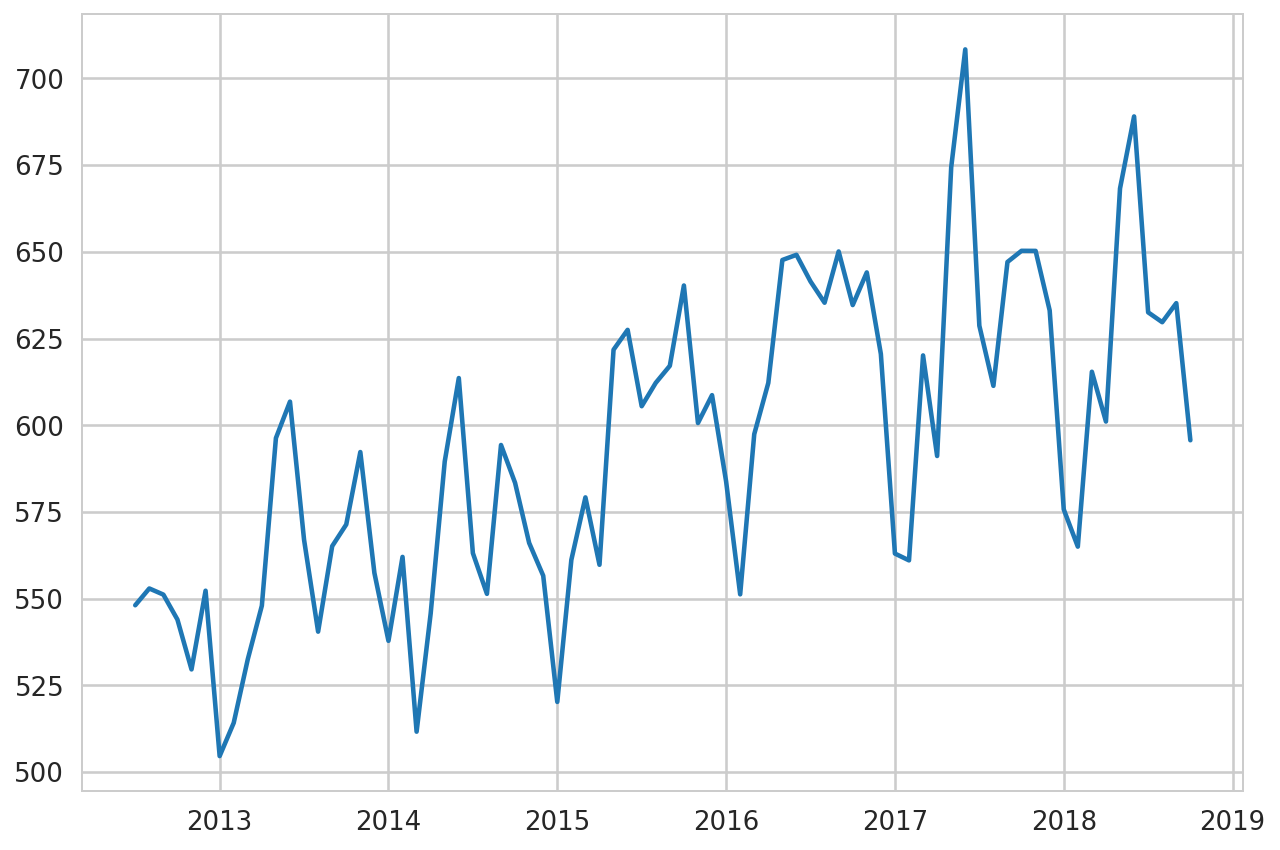

In [50]:
(df.DATE
 .value_counts()
 .sort_index()
 .resample('1M') # group x axis data points
 .mean() # group value is determined by mean
 .plot()
)

#### Solution 

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y")

In [ ]:
(
    df.DATE.value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .drop(pd.to_datetime('2018-05-31'), axis='index') # drop the current month
    .plot() # plot the result
)

### Task 8

Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

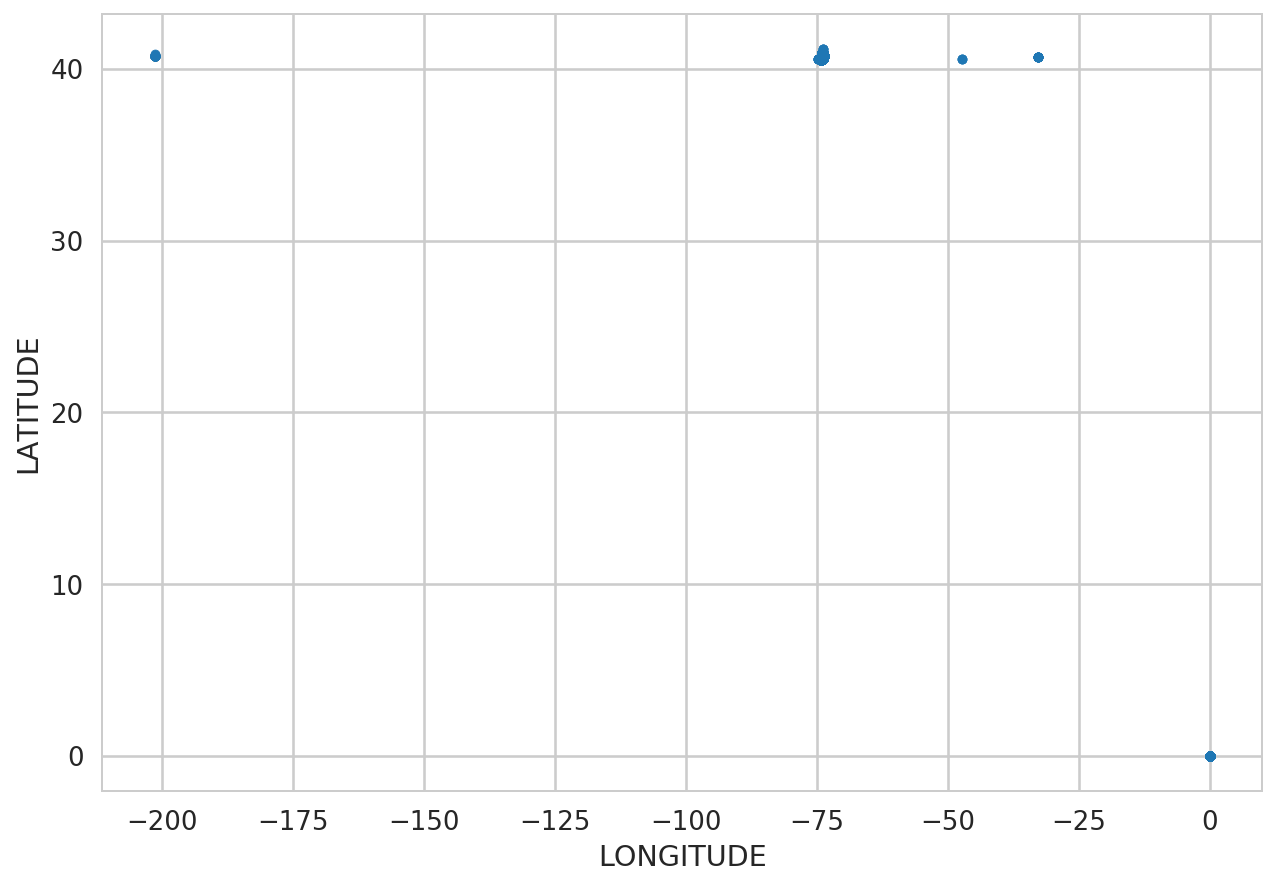

In [51]:
df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE')

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

cleandf.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Task 9

Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_df = cleandf[mask_injured]

injured_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Bonus plots

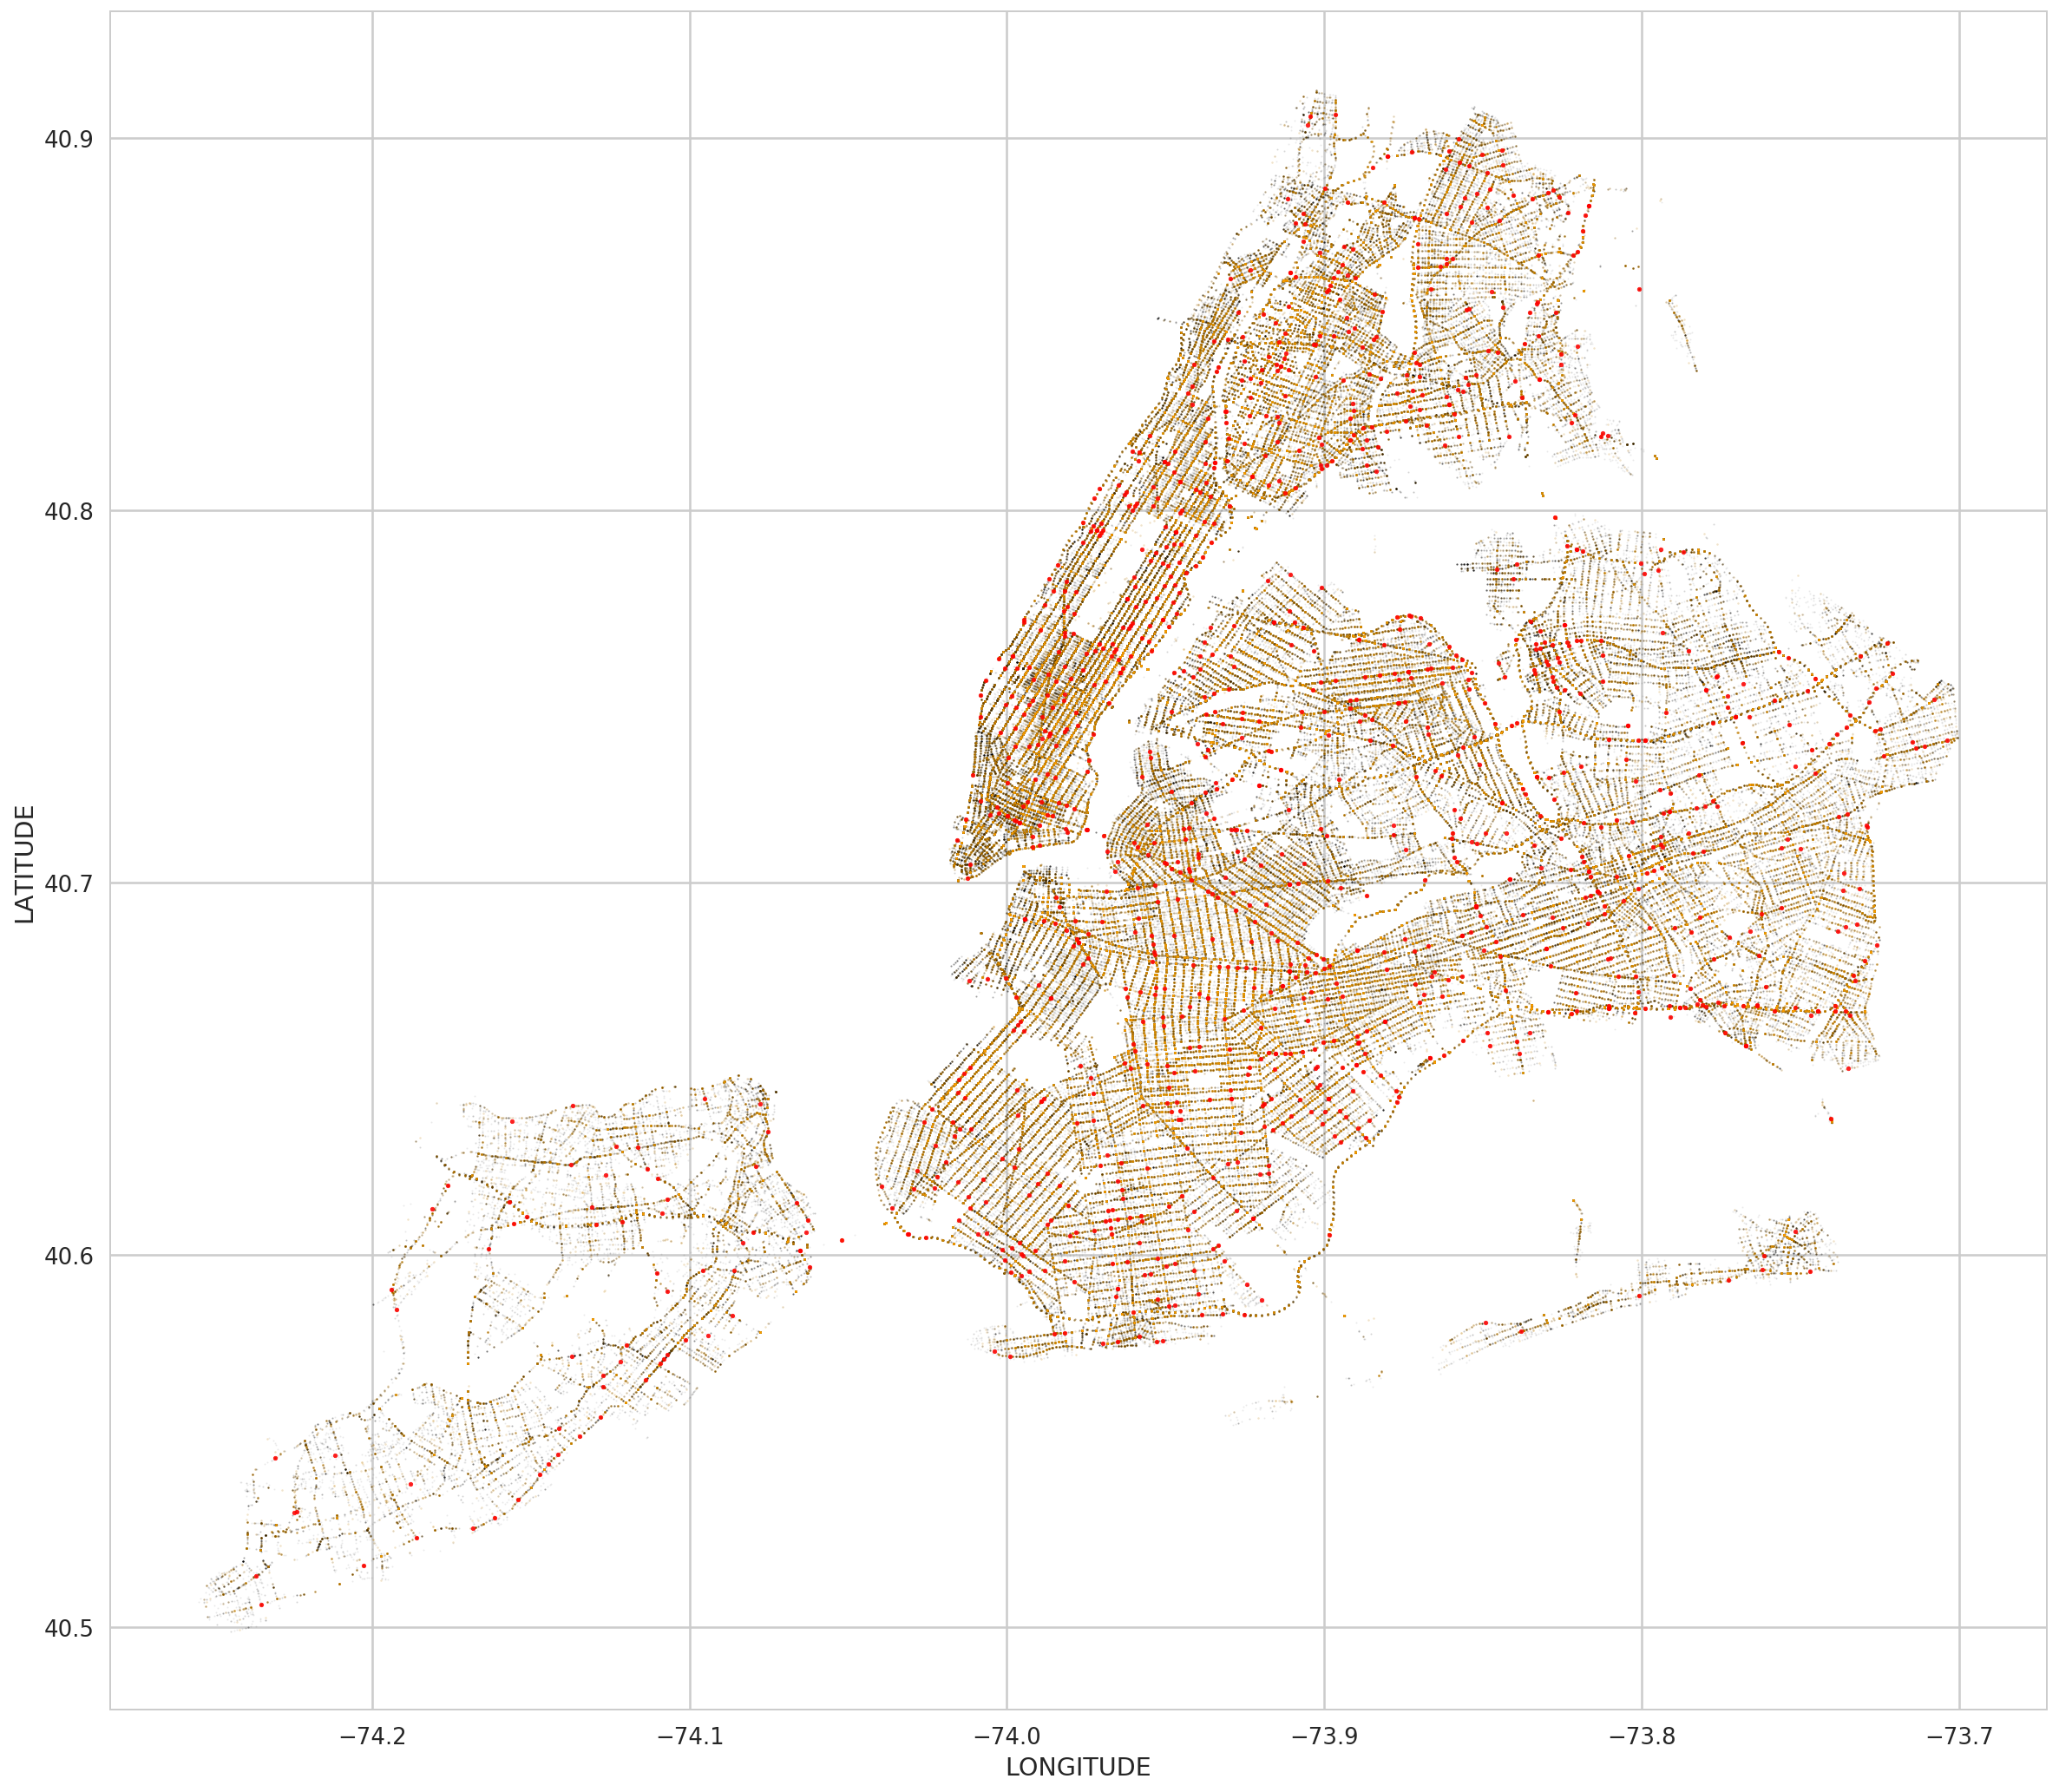

In [52]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

#df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the marker just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots !!!!!!!
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots, plotting on top of two graphs actually
)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


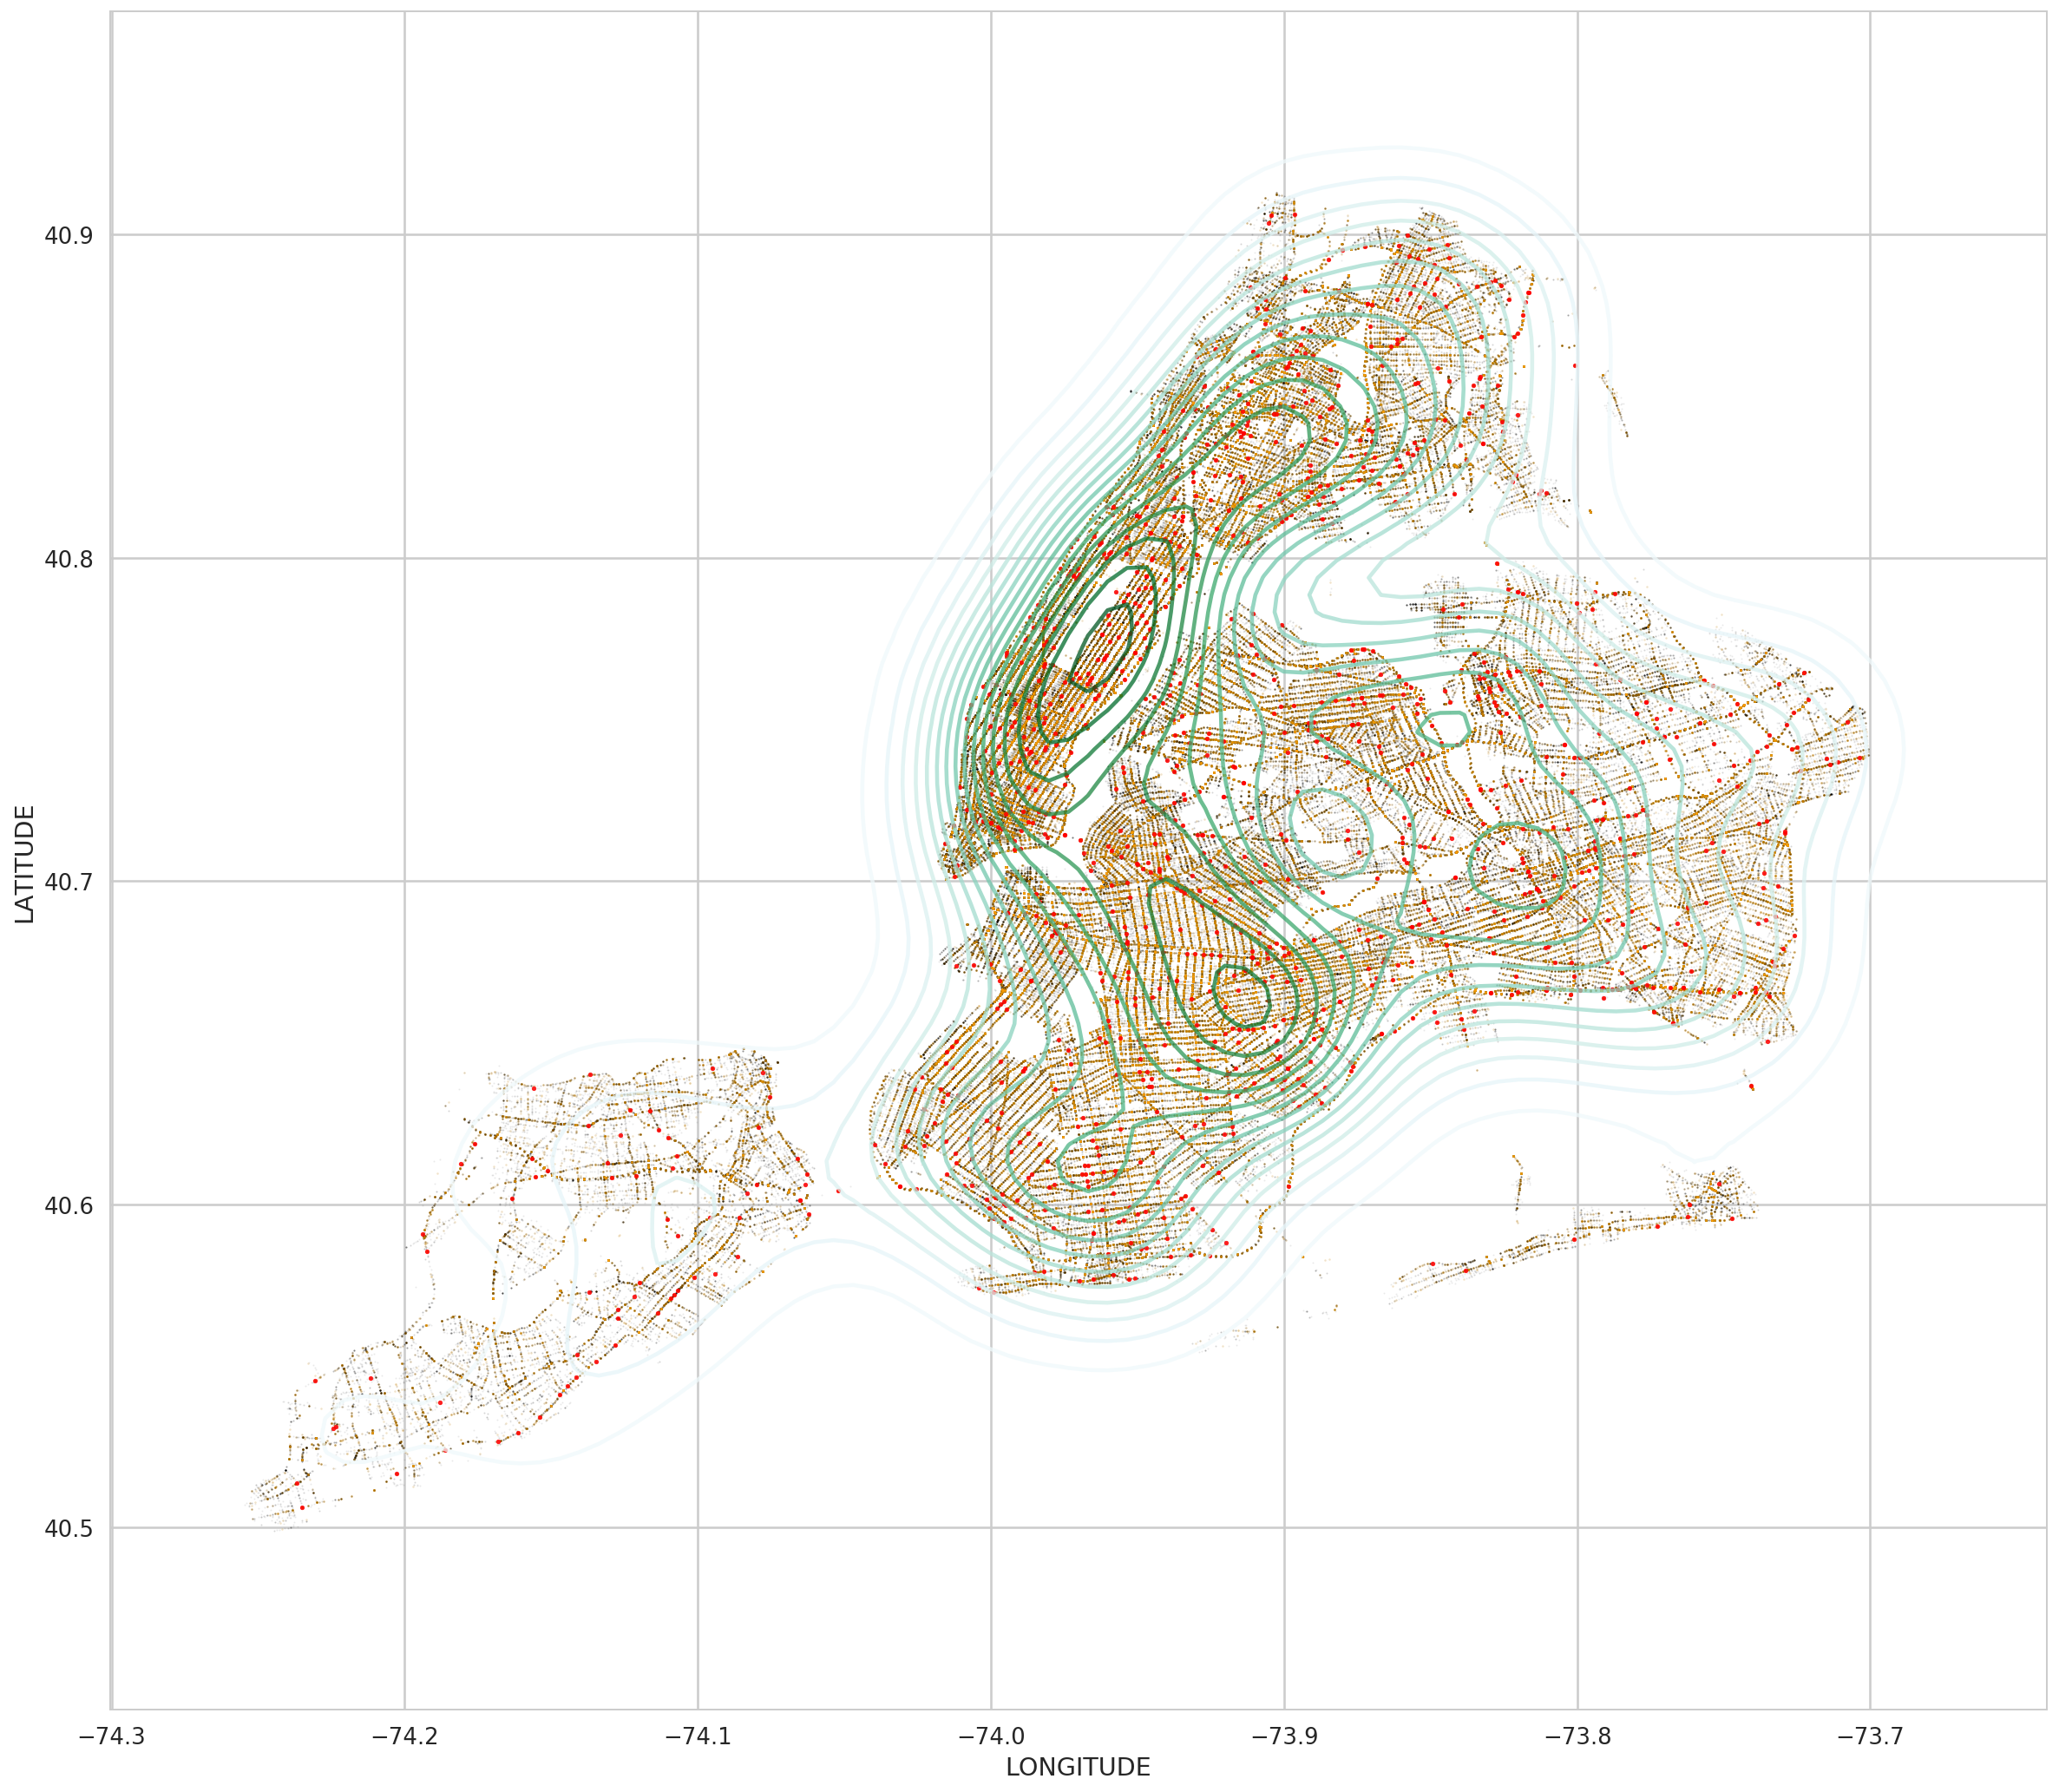

In [53]:
# Same as above, but with a 2-d density estimation for the location of
# accidents that resulted in at least one death

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
killed_plot = cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100,
            cmap=plt.cm.BuGn, shade=False, shade_lowest=True, n_levels=20, alpha=0.75, ax = killed_plot)
